In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# notes: scanpy has several versions, afer 17May2020, it become 1.5.1 from 1.4.6
!pip install scanpy
!pip install leidenalg

In [ ]:
#!pip install bbknn==1.3.6
#pip install umap-learn==0.3.9

In [ ]:
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# notice that scanpy already became 1.5.1 after 17May2020
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, figsize=(6, 6))

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.18.5 scipy==1.4.1 pandas==1.0.4 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2 leidenalg==0.8.0


In [ ]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/Florian_data")

In [ ]:
%ls -lth

In [ ]:
adata= sc.read_h5ad("hypothalamic_exclude_heg.h5ad")

In [ ]:
adata

AnnData object with n_obs × n_vars = 19182 × 4843
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'leiden', 'leiden_0.2_colors', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
sc.pl.umap(adata, color=["MAP2", "NKX2-1", "POMC", "OTP"], size=15)

Output hidden; open in https://colab.research.google.com to view.

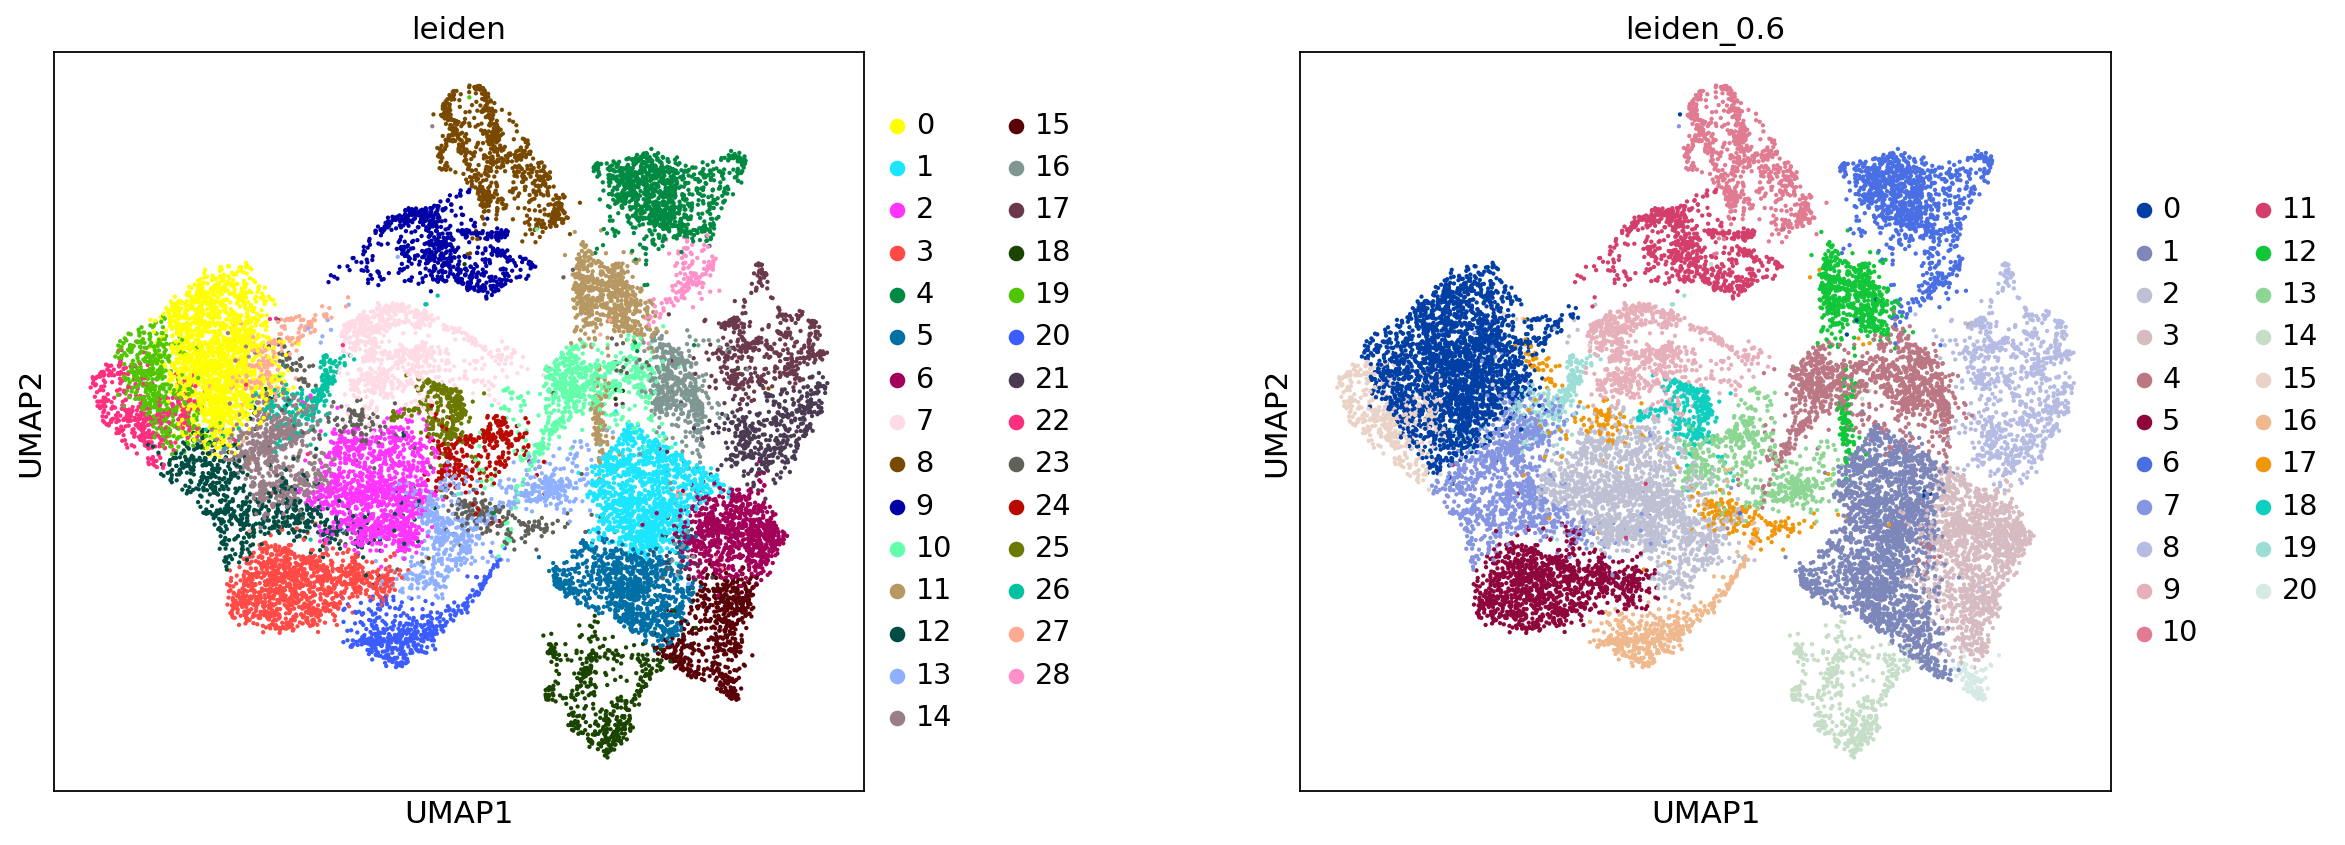

In [ ]:
sc.pl.umap(adata, color=["leiden", "leiden_0.6"], wspace=0.4, size=15)

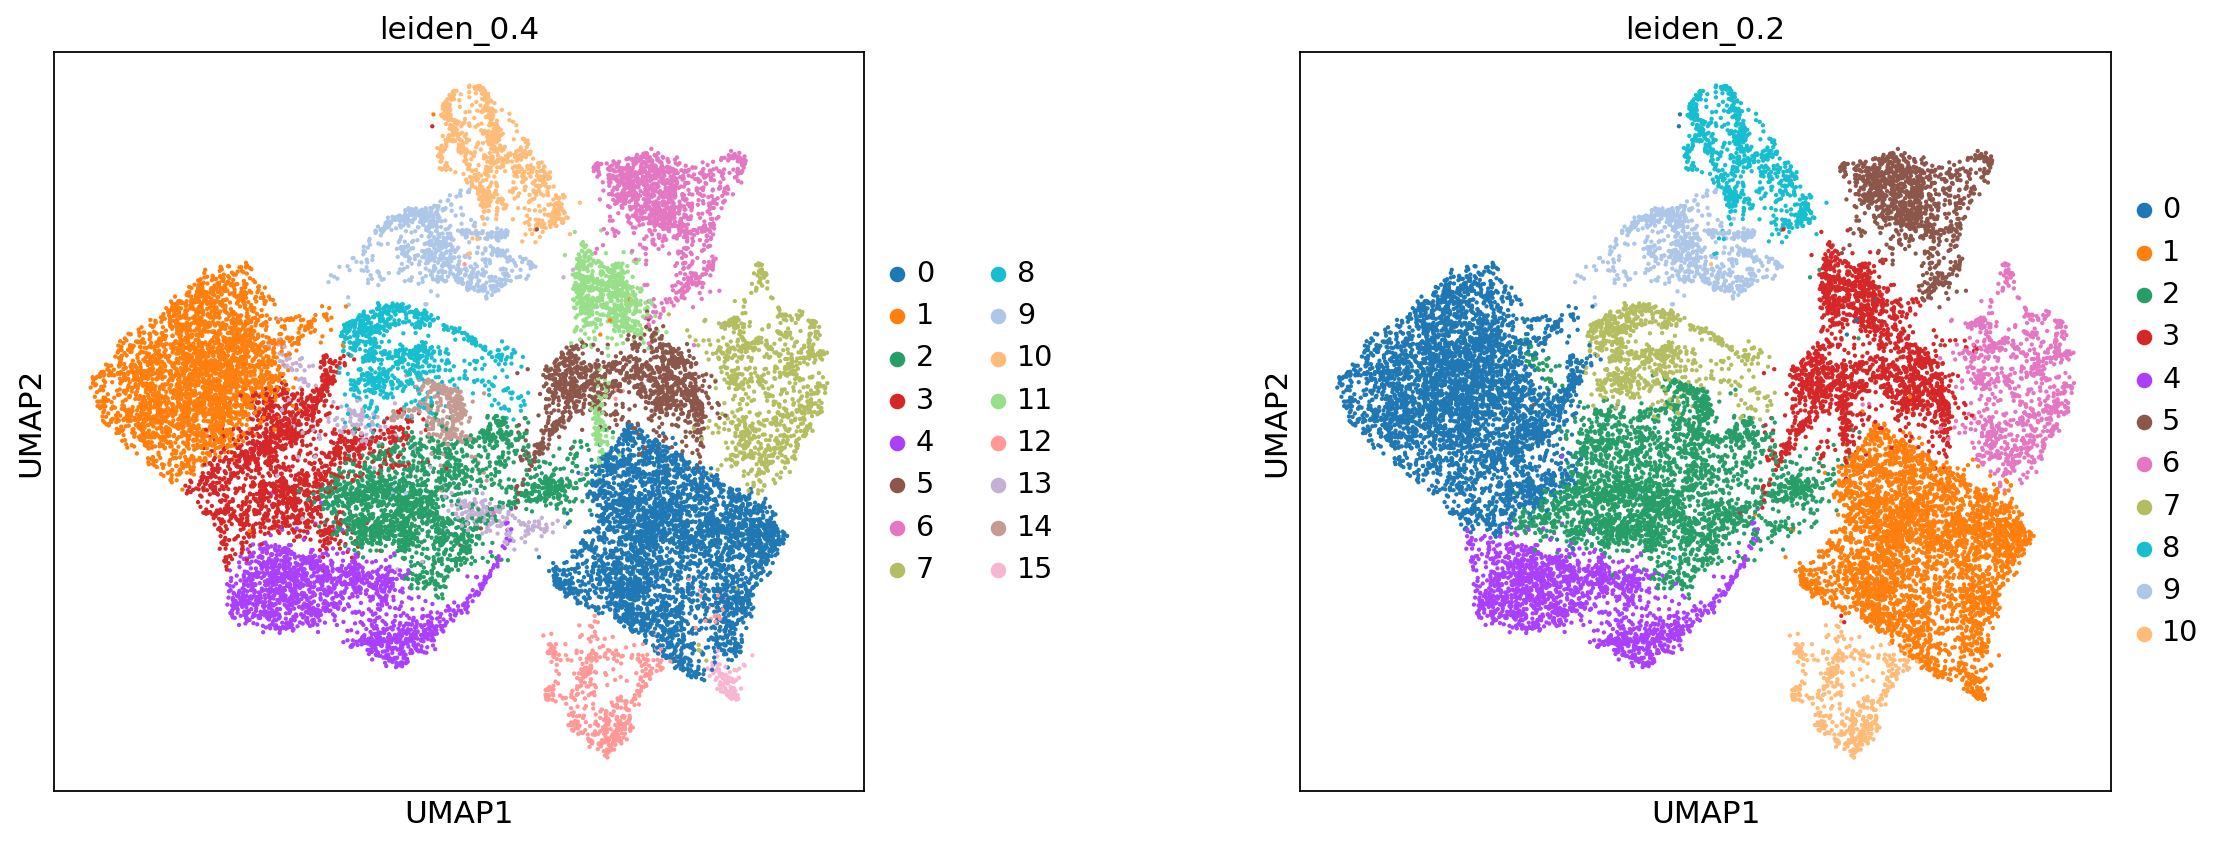

In [ ]:
sc.pl.umap(adata, color=["leiden_0.4", "leiden_0.2"], wspace=0.4, save="_hypthalamic", size=15)

# Finding Marker genes

# check leiden_0.2

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:01)


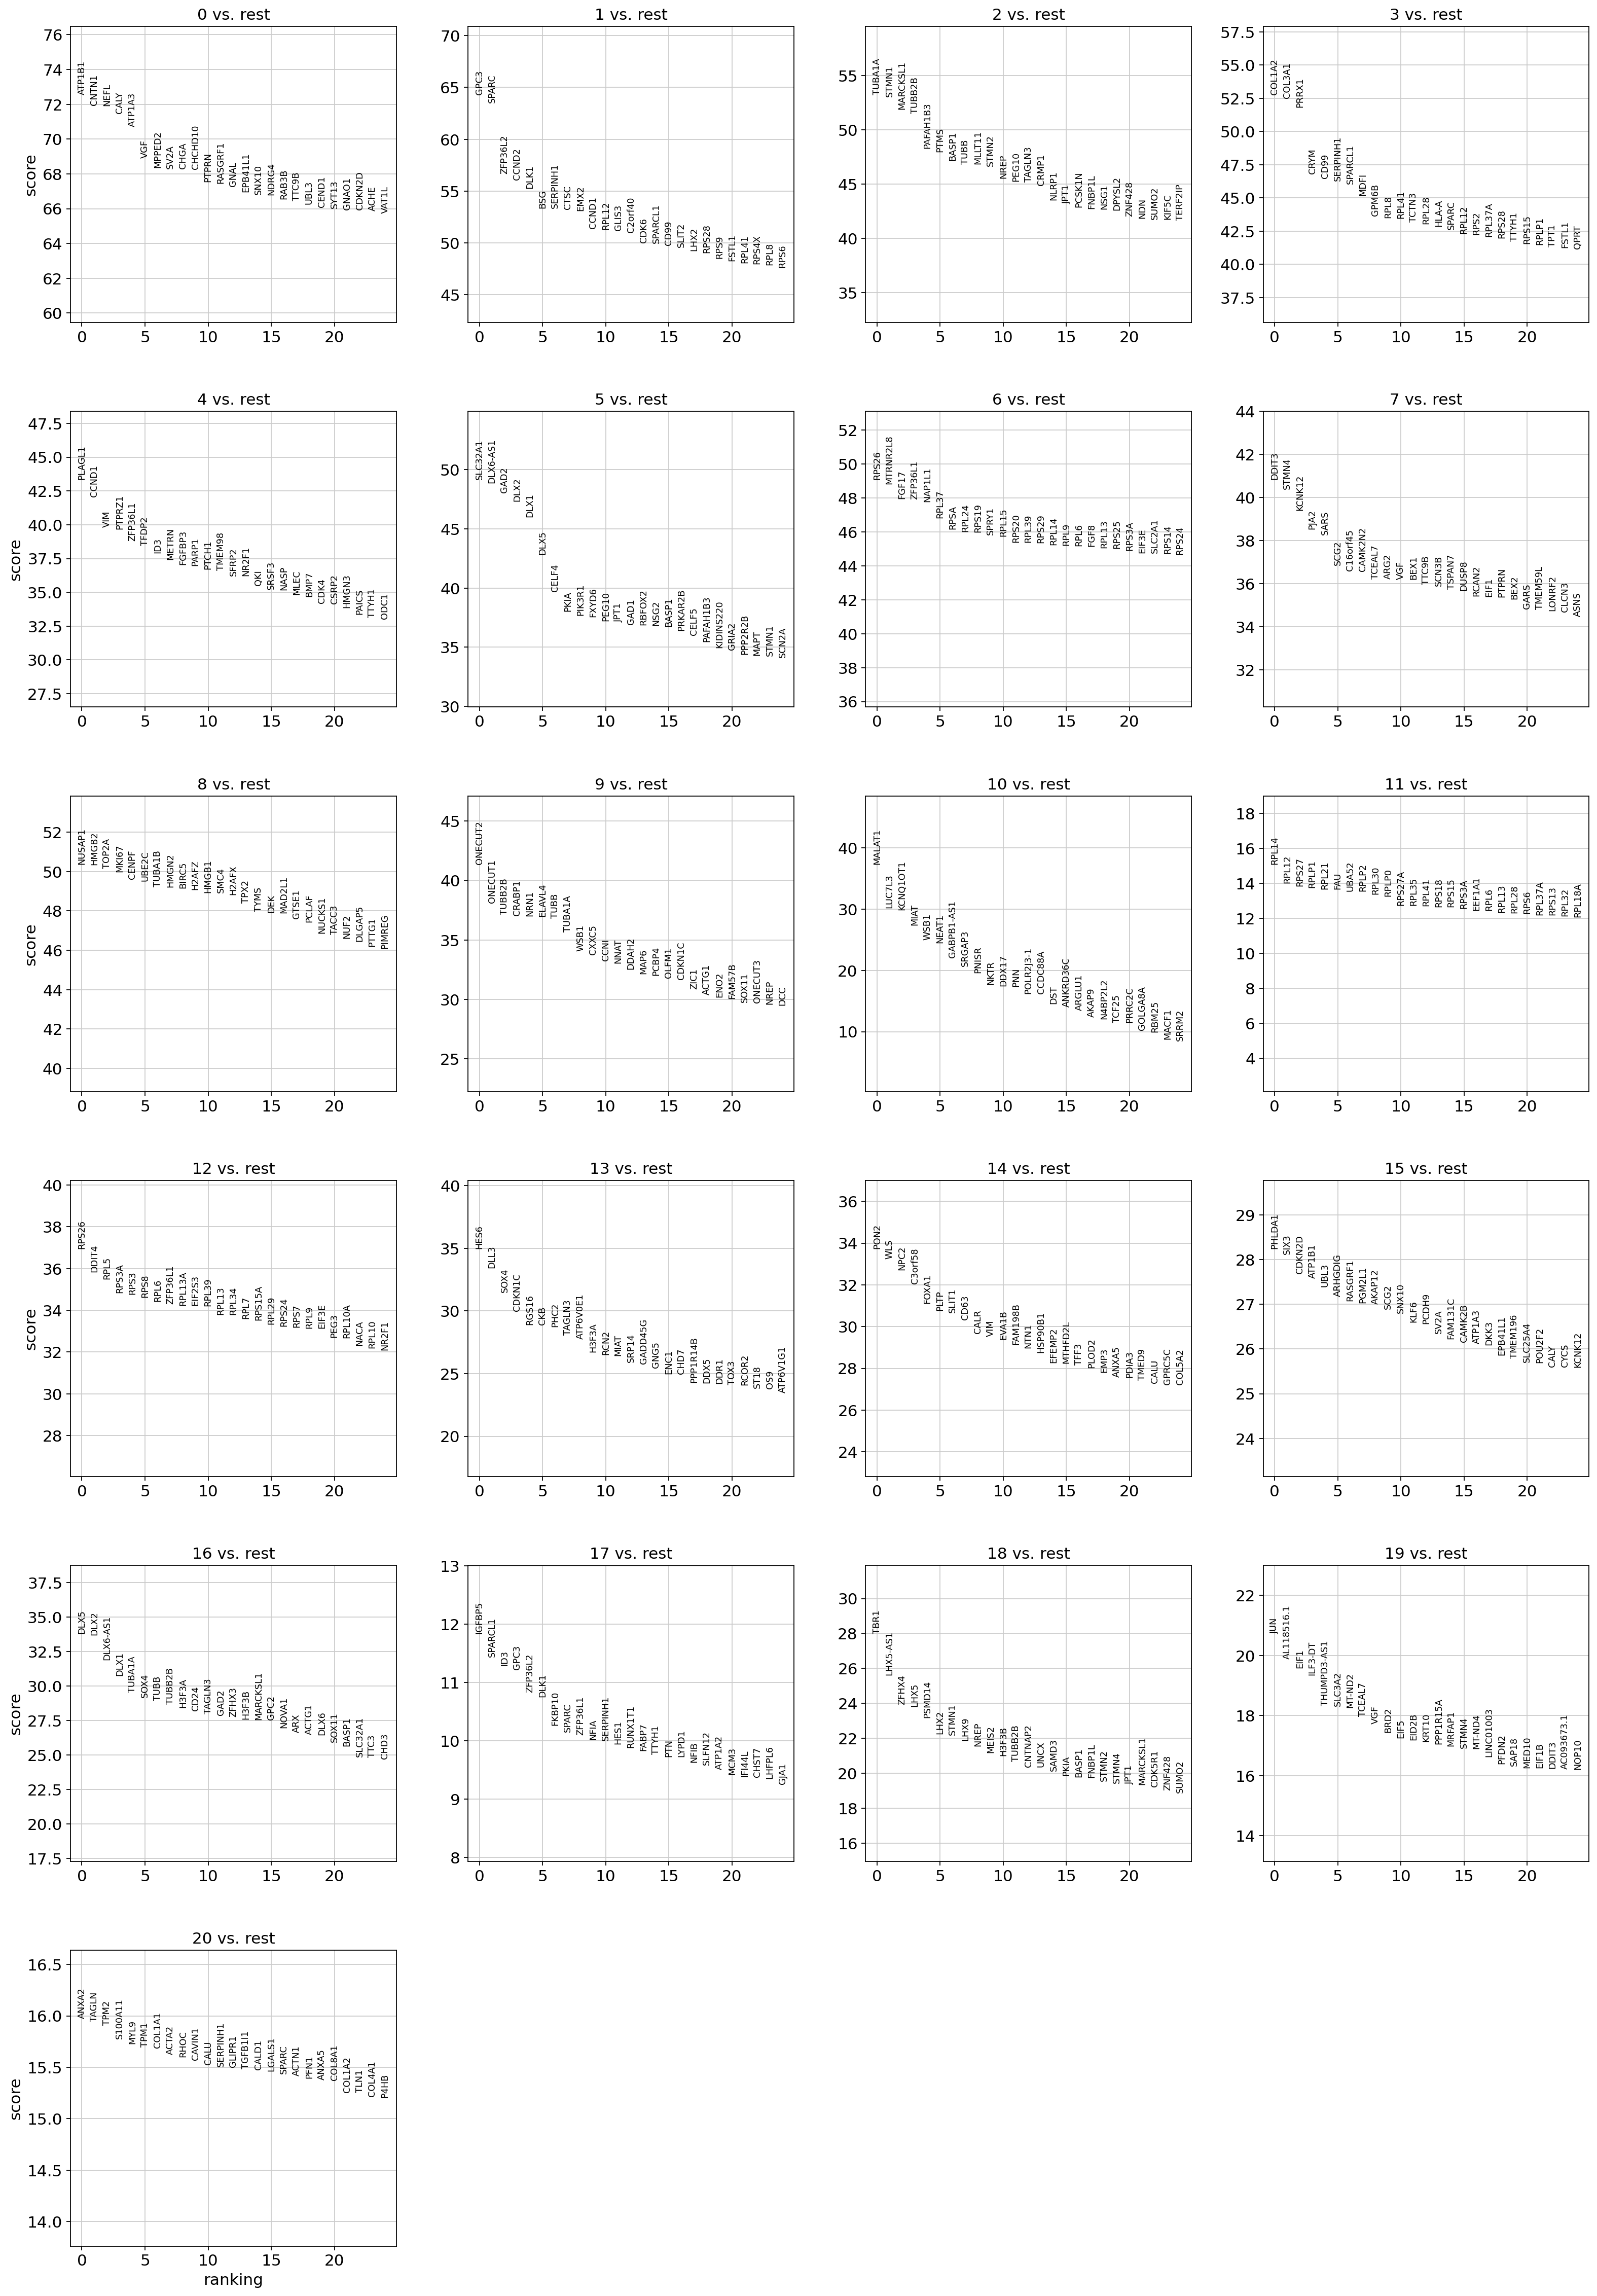

In [ ]:
# default 100 genes
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
df = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
df.head(25)

0         1         2  ...        18           19        20
0    ATP1B1      GPC3    TUBA1A  ...      TBR1          JUN     ANXA2
1     CNTN1     SPARC     STMN1  ...  LHX5-AS1   AL118516.1     TAGLN
2      NEFL   ZFP36L2  MARCKSL1  ...     ZFHX4         EIF1      TPM2
3      CALY     CCND2    TUBB2B  ...      LHX5      ILF3-DT   S100A11
4    ATP1A3      DLK1  PAFAH1B3  ...    PSMD14  THUMPD3-AS1      MYL9
5       VGF       BSG      PTMS  ...      LHX2       SLC3A2      TPM1
6    MPPED2  SERPINH1     BASP1  ...     STMN1       MT-ND2    COL1A1
7      SV2A      CTSC      TUBB  ...      LHX9       TCEAL7     ACTA2
8      CHGA      EMX2    MLLT11  ...      NREP          VGF      RHOC
9   CHCHD10     CCND1     STMN2  ...     MEIS2         BRD2    CAVIN1
10    PTPRN     RPL12      NREP  ...     H3F3B         EIF5      CALU
11  RASGRF1     GLIS3     PEG10  ...    TUBB2B        EID2B  SERPINH1
12     GNAL   C2orf40    TAGLN3  ...   CNTNAP2        KRT10    GLIPR1
13  EPB41L1      CDK6     CRMP1  ...      UNCX     PPP1R15A   TGFB1I1
14    SNX10   SPARCL1     NLRP1  ...     SAMD3       MRFAP1     CALD1
15    NDRG4      CD99      JPT1  ...      PKIA        STMN4    LGALS1
16    RAB3B     SLIT2    PCSK1N  ...     BASP1       MT-ND4     SPARC
17    TTC9B      LHX2    FNBP1L  ...    FNBP1L    LINC01003     ACTN1
18     UBL3     RPS28      NSG1  ...     STMN2        PFDN2      PFN1
19    CEND1      RPS9    DPYSL2  ...     STMN4        SAP18     ANXA5
20    SYT13     FSTL1    ZNF428  ...      JPT1        MED10    COL8A1
21    GNAO1     RPL41       NDN  ...  MARCKSL1        EIF1B    COL1A2
22   CDKN2D     RPS4X     SUMO2  ...    CDK5R1        DDIT3      TLN1
23     ACHE      RPL8     KIF5C  ...    ZNF428   AC093673.1    COL4A1
24    VAT1L      RPS6   TERF2IP  ...     SUMO2        NOP10      P4HB

[25 rows x 21 columns]

In [ ]:
df.to_csv("hypothalamic_DE_0.6.csv")

In [ ]:
df_t = df.T
df_t

0           1         2   ...         97        98         99
0    ATP1B1       CNTN1      NEFL  ...    SLC6A17   ATP13A2     DYNLT3
1      GPC3       SPARC   ZFP36L2  ...      CHST7     RPL19     RPL37A
2    TUBA1A       STMN1  MARCKSL1  ...       PAK2    MARCKS     ELAVL4
3    COL1A2      COL3A1     PRRX1  ...       NME4    RPS4Y1     RPL18A
4    PLAGL1       CCND1       VIM  ...      SEPT2  CCNB1IP1       TCF3
5   SLC32A1    DLX6-AS1      GAD2  ...      TRIM2     N4BP2       SV2A
6     RPS26    MTRNR2L8     FGF17  ...    COL18A1    IMPDH2      LTA4H
7     DDIT3       STMN4    KCNK12  ...      KIF5C  MAP1LC3B     KIF21A
8    NUSAP1       HMGB2     TOP2A  ...  HNRNPA2B1      BUB1       SAE1
9   ONECUT2     ONECUT1    TUBB2B  ...      NXPH4   PPP1R18       AKT3
10   MALAT1      LUC7L3  KCNQ1OT1  ...        OMD    ADGRV1  ALG13-AS1
11    RPL14       RPL12     RPS27  ...     COMMD6   HNRNPA1      COX7C
12    RPS26       DDIT4      RPL5  ...      RPS10    FGFBP3      ZFAS1
13     HES6        DLL3      SOX4  ...    CBFA2T2      TCF3     ADGRV1
14     PON2         WLS      NPC2  ...      RRBP1    CCDC80   LGALS3BP
15   PHLDA1        SIX3    CDKN2D  ...       DNER    ASPHD1       NEFL
16     DLX5        DLX2  DLX6-AS1  ...   ARHGAP21      H1FX      AMER2
17   IGFBP5     SPARCL1       ID3  ...      PCDH9     SESN3      FSTL1
18     TBR1    LHX5-AS1     ZFHX4  ...      NCAM1      EIF1      MACO1
19      JUN  AL118516.1      EIF1  ...       EMC7      A1BG       DAD1
20    ANXA2       TAGLN      TPM2  ...       NEXN    PDLIM2      GSTP1

[21 rows x 100 columns]

In [ ]:
cluster1 = df.loc[:,"0"].values
cluster1

array(['ATP1B1', 'CNTN1', 'NEFL', 'CALY', 'ATP1A3', 'VGF', 'MPPED2',
       'SV2A', 'CHGA', 'CHCHD10', 'PTPRN', 'RASGRF1', 'GNAL', 'EPB41L1',
       'SNX10', 'NDRG4', 'RAB3B', 'TTC9B', 'UBL3', 'CEND1', 'SYT13',
       'GNAO1', 'CDKN2D', 'ACHE', 'VAT1L', 'VAMP2', 'SYP', 'ATP8A2',
       'CYCS', 'TSTD1', 'SYT1', 'ISL1', 'TMEM59L', 'NEFM', 'SCG5',
       'FBXO2', 'SNAP25', 'ARHGDIG', 'CAMK2N1', 'FAM131C', 'ATP6V0E2',
       'AKAP12', 'GABRG2', 'CREG2', 'LY6H', 'ATP6V0B', 'SEZ6L2',
       'ZNF385D', 'HPGD', 'COX6A1', 'PGM2L1', 'PLA2G16', 'SERPINB9',
       'GNG4', 'DNM3', 'ARFGEF3', 'GRIA4', 'SLC25A4', 'TMOD2', 'KITLG',
       'ATP6V1A', 'UBE2QL1', 'GHITM', 'CPLX2', 'DUSP4', 'NSF', 'OPTN',
       'RETREG1', 'SCG2', 'DNER', 'SYNGR3', 'MT-ND2', 'MT-ND4', 'PDE5A',
       'CLSTN2', 'COMTD1', 'EEF1A2', 'PIP4P2', 'KCNJ5', 'KIF21A', 'CHGB',
       'RFK', 'ANK2', 'DKK3', 'VEGFB', 'CAMK2B', 'ICA1', 'BEX1',
       'AC010478.1', 'TTC39A', 'MAP1LC3A', 'PFKP', 'OXCT1', 'IDS', 'NPM2',
       'OSBPL8', '

In [ ]:
adata.write("hypothalamic_exclude_heg.h5ad")

In [ ]:
top1 = pd.DataFrame(adata.uns['rank_genes_groups']['names']).iloc[0, :].values
top1


array(['VGF', 'SPARC', 'TUBA1A', 'ZFP36L1', 'DLX6-AS1', 'MTRNR2L8',
       'HMGB2', 'ONECUT2', 'MALAT1', 'RPL14', 'PON2'], dtype=object)

MAP2


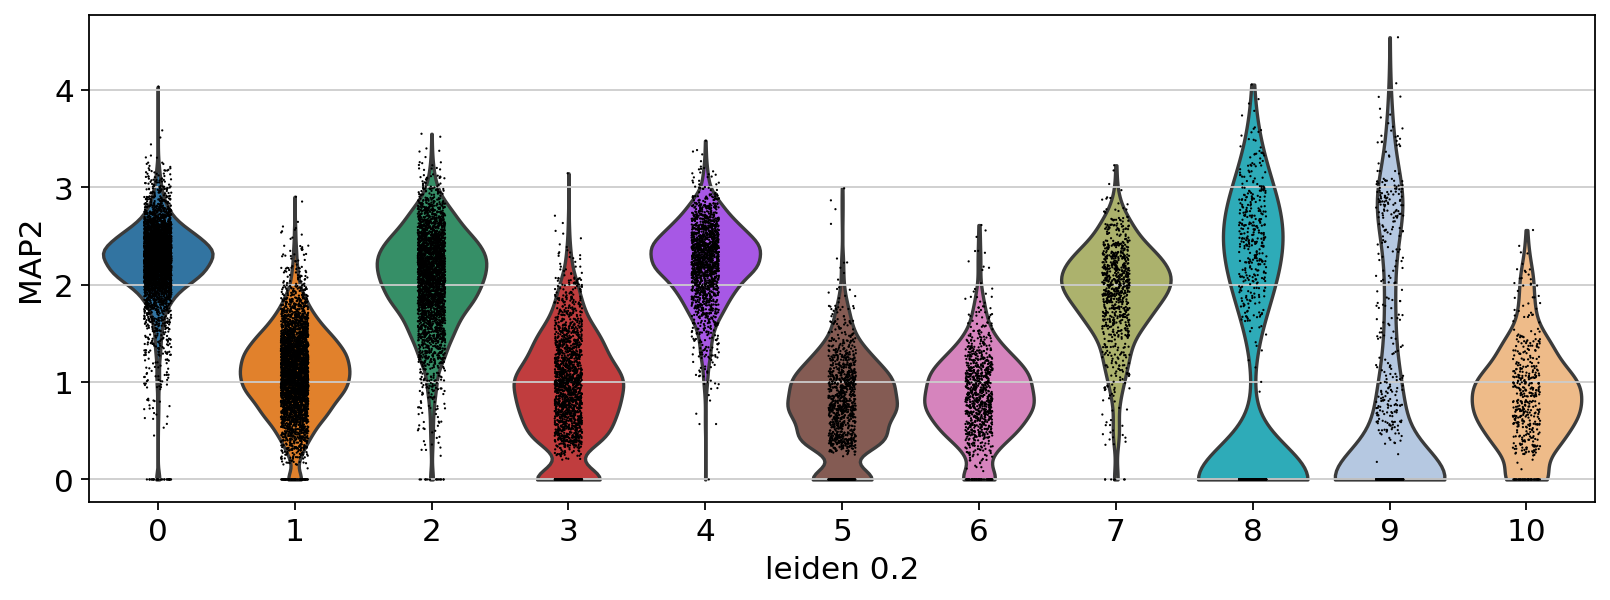

NKX2-1


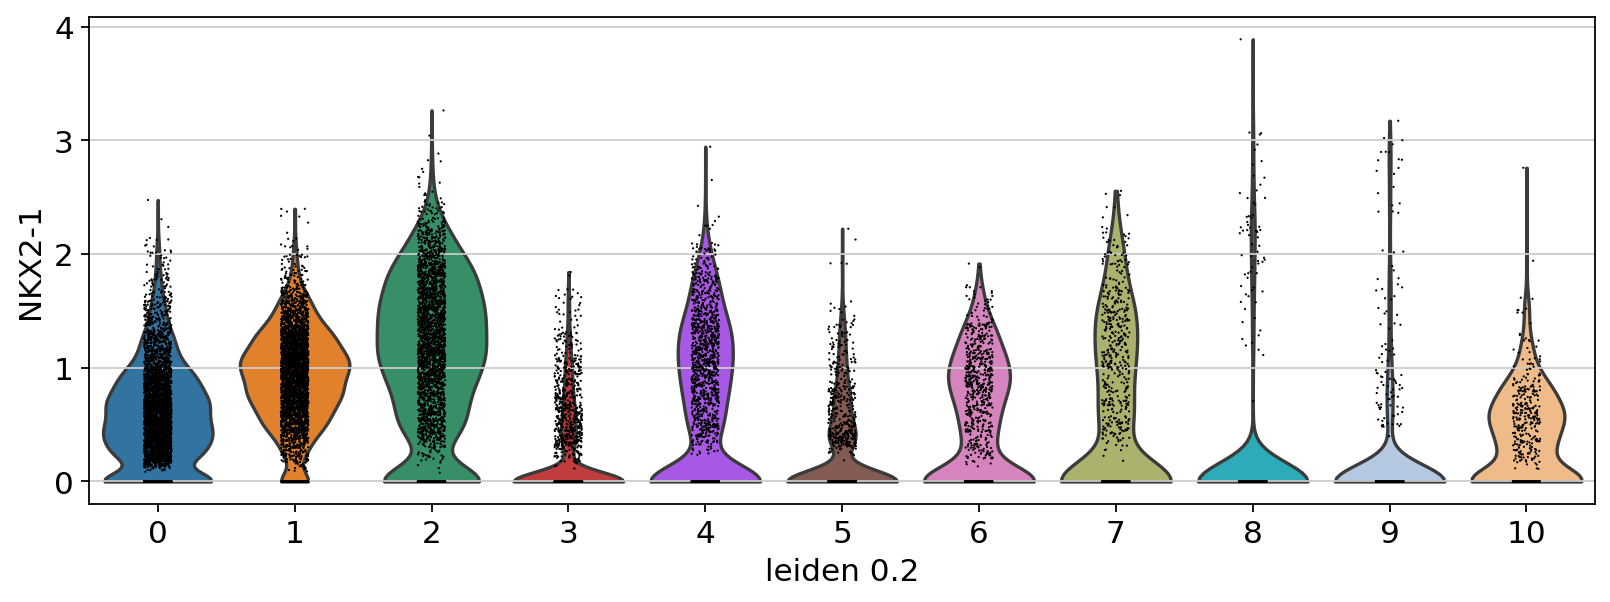

POMC


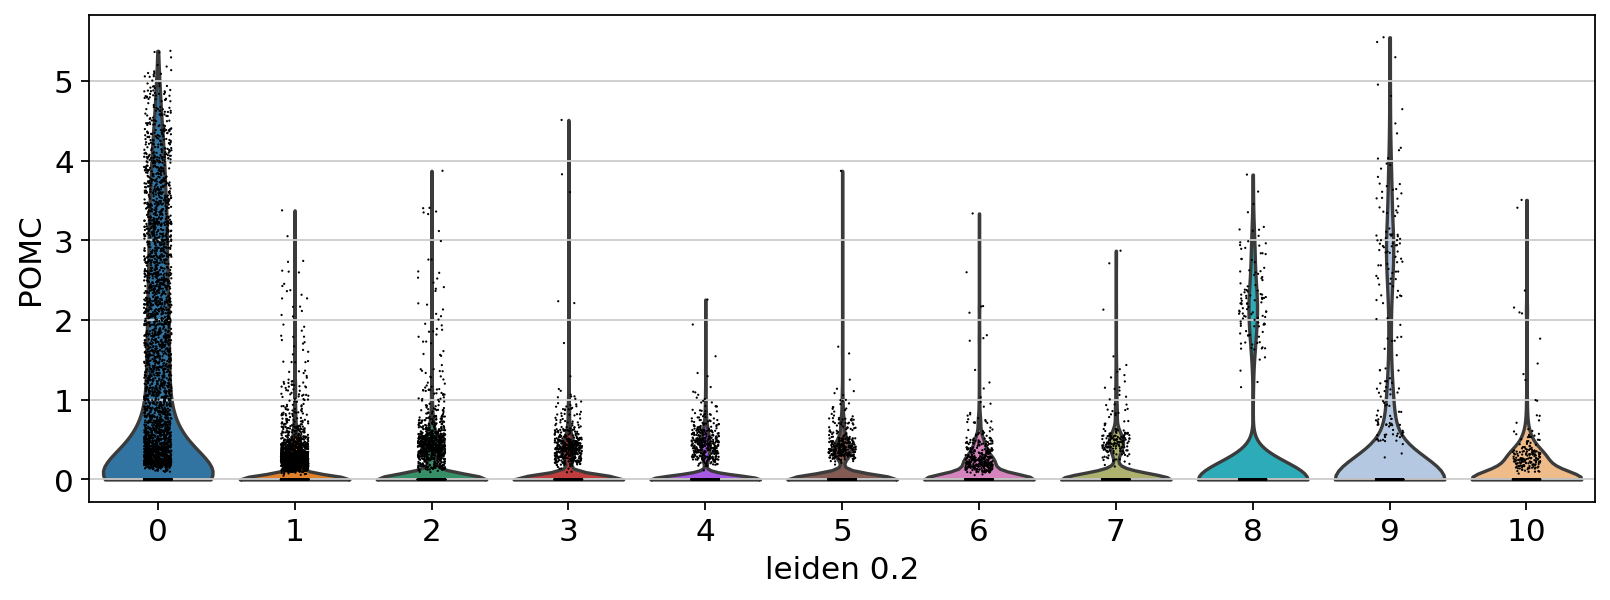

OTP


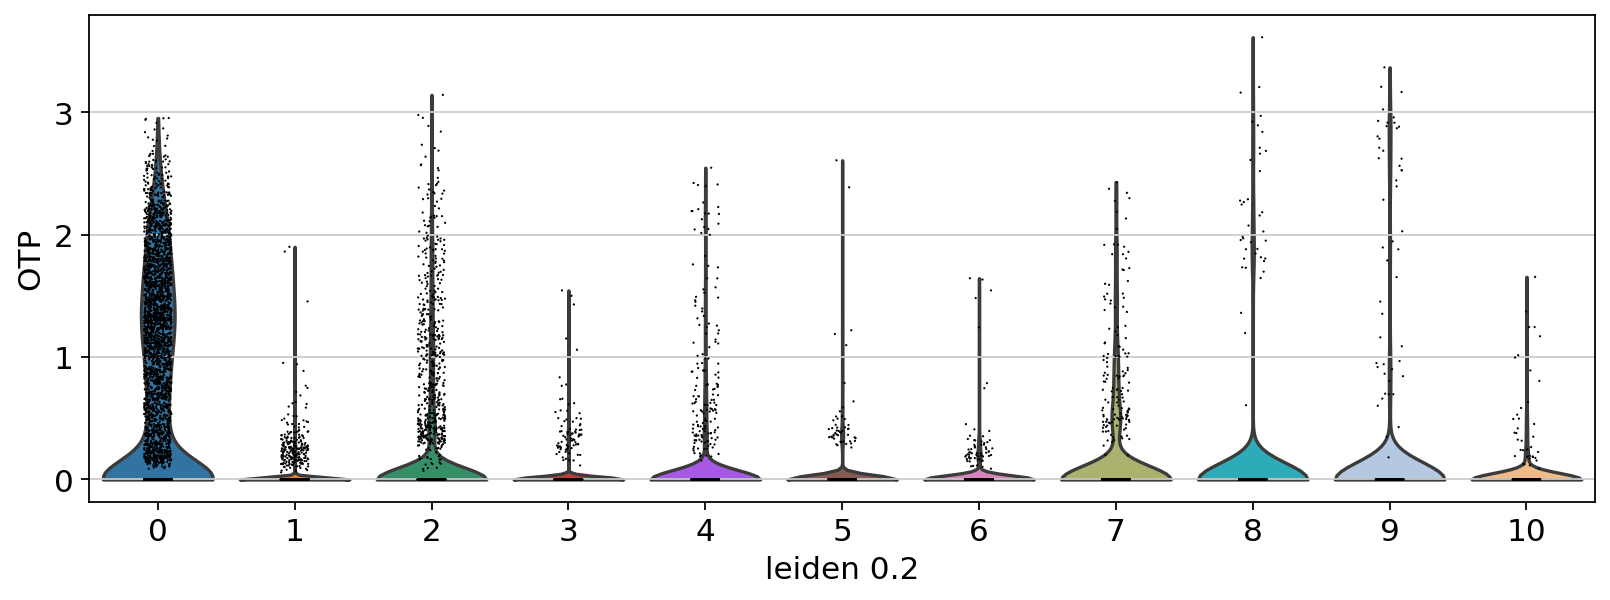

AGRP


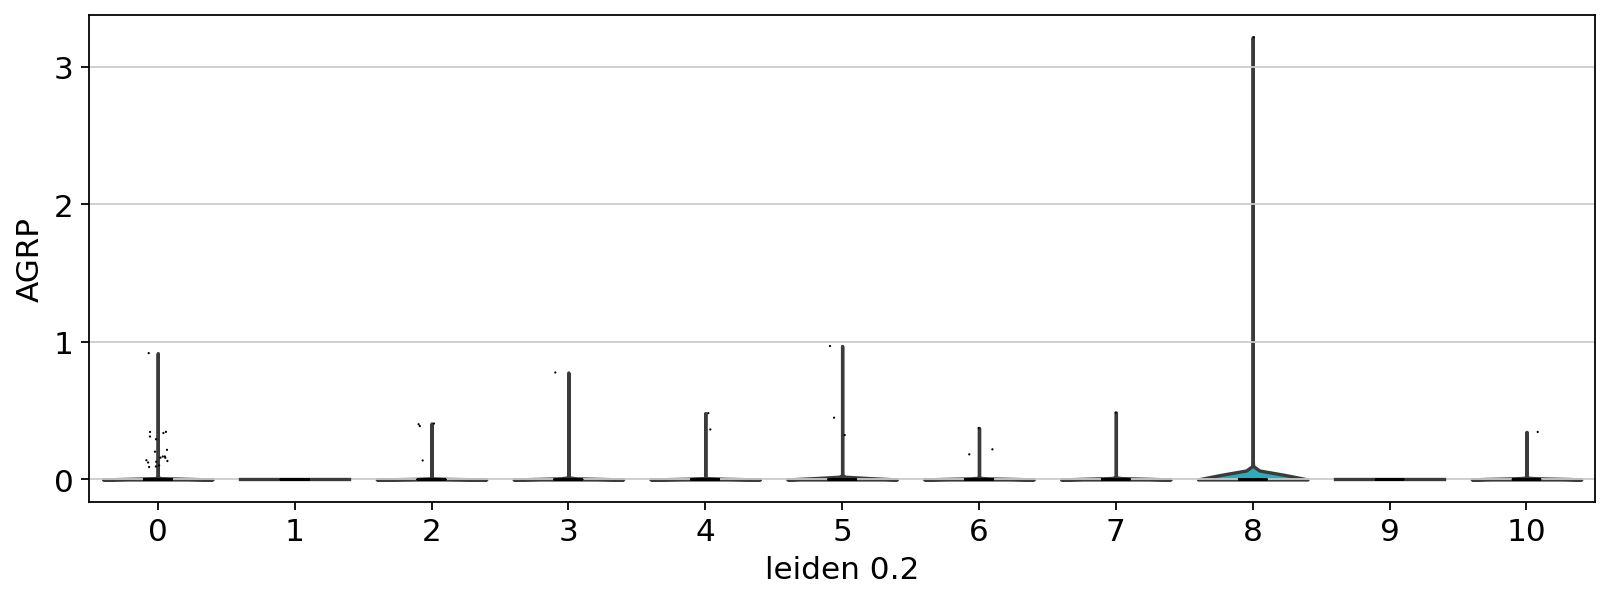

HCRT


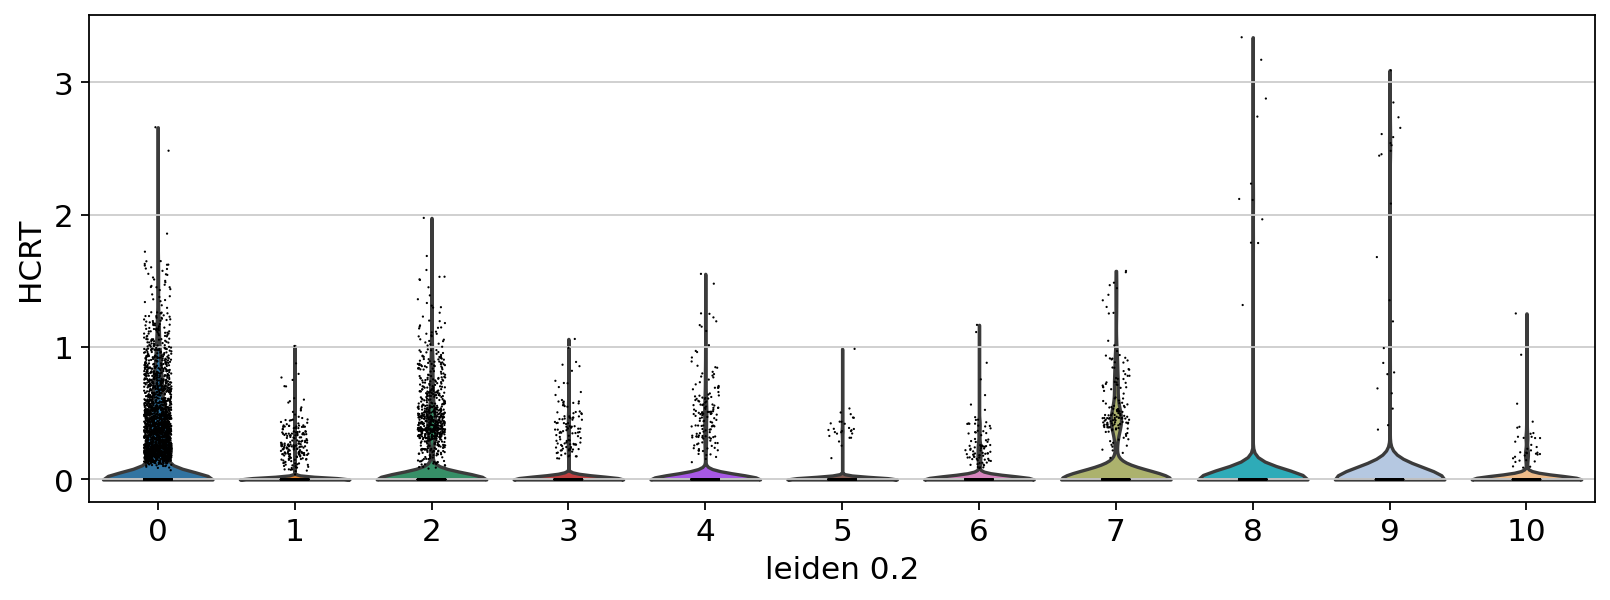

PMCH


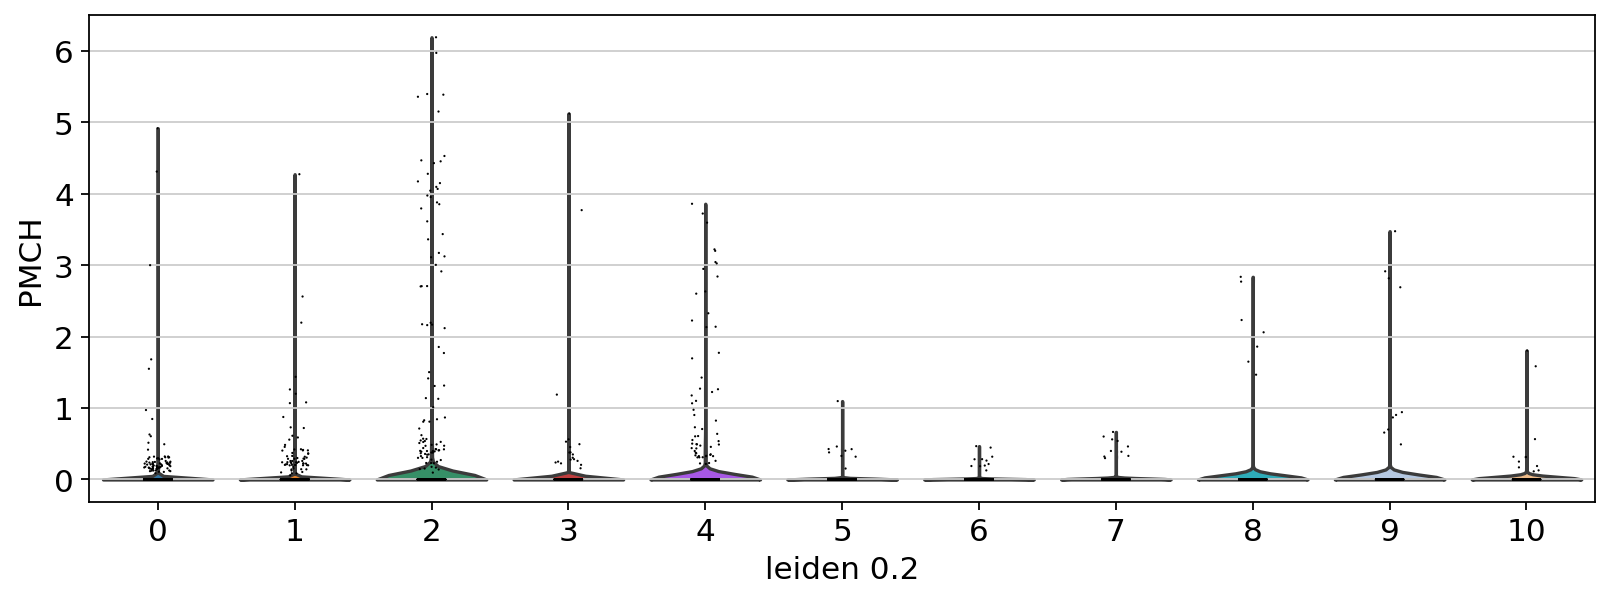

SIM2


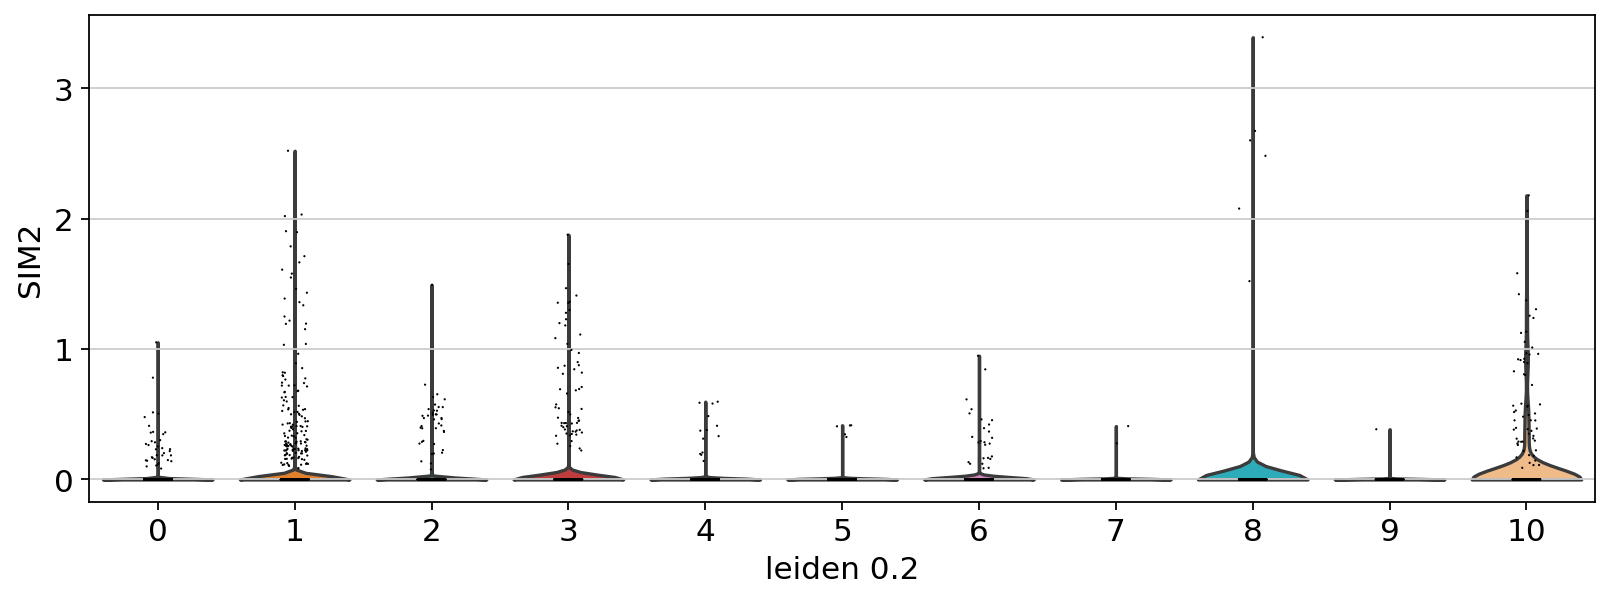

In [ ]:
paper_gene = ["MAP2", "NKX2-1", "POMC", "OTP", "AGRP", "HCRT", "PMCH", "SIM1"]
sc.settings.set_figure_params(dpi=80, figsize=(10, 4))
for gene in paper_gene:
  print(gene)
  sc.pl.violin(adata, gene, groupby='leiden_0.2')

In [ ]:
sc.settings.set_figure_params(dpi=80, figsize=(10, 4))
for gene in top1:
  print(gene)
  sc.pl.violin(adata, gene, groupby='leiden_0.2')

Output hidden; open in https://colab.research.google.com to view.

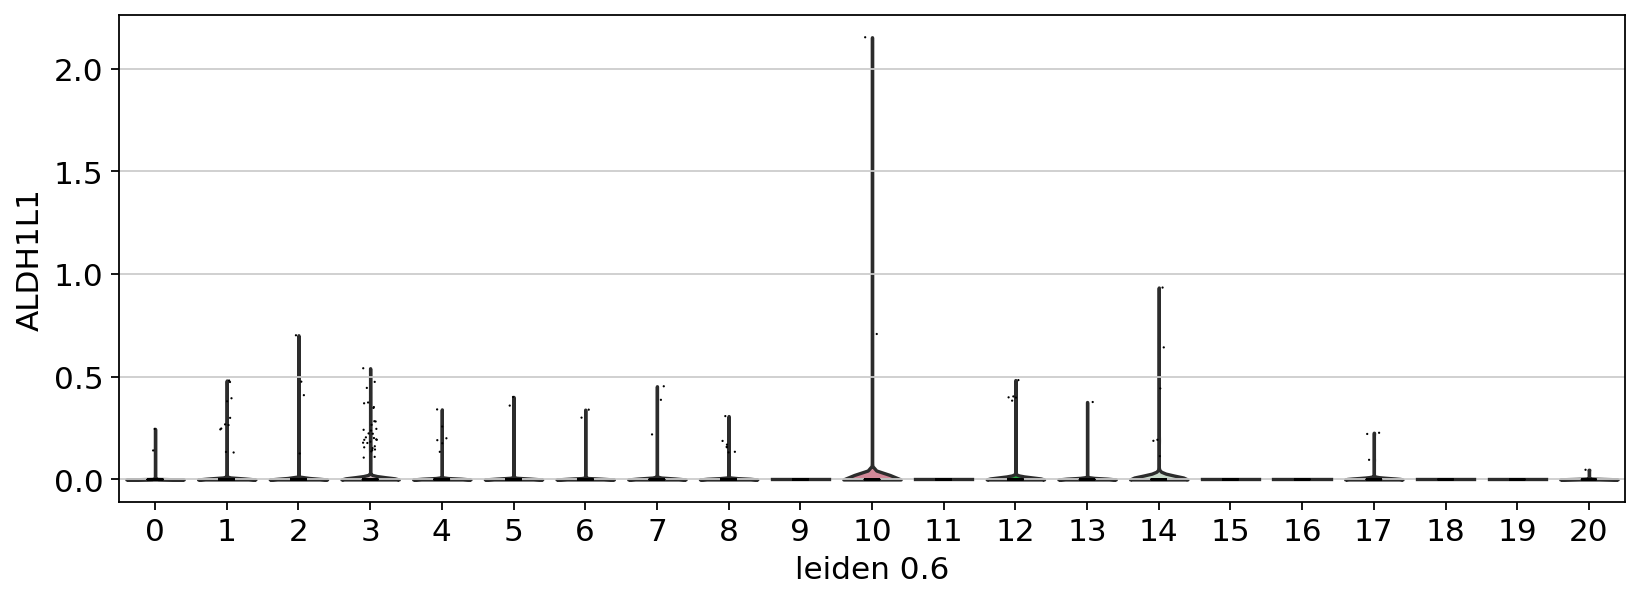

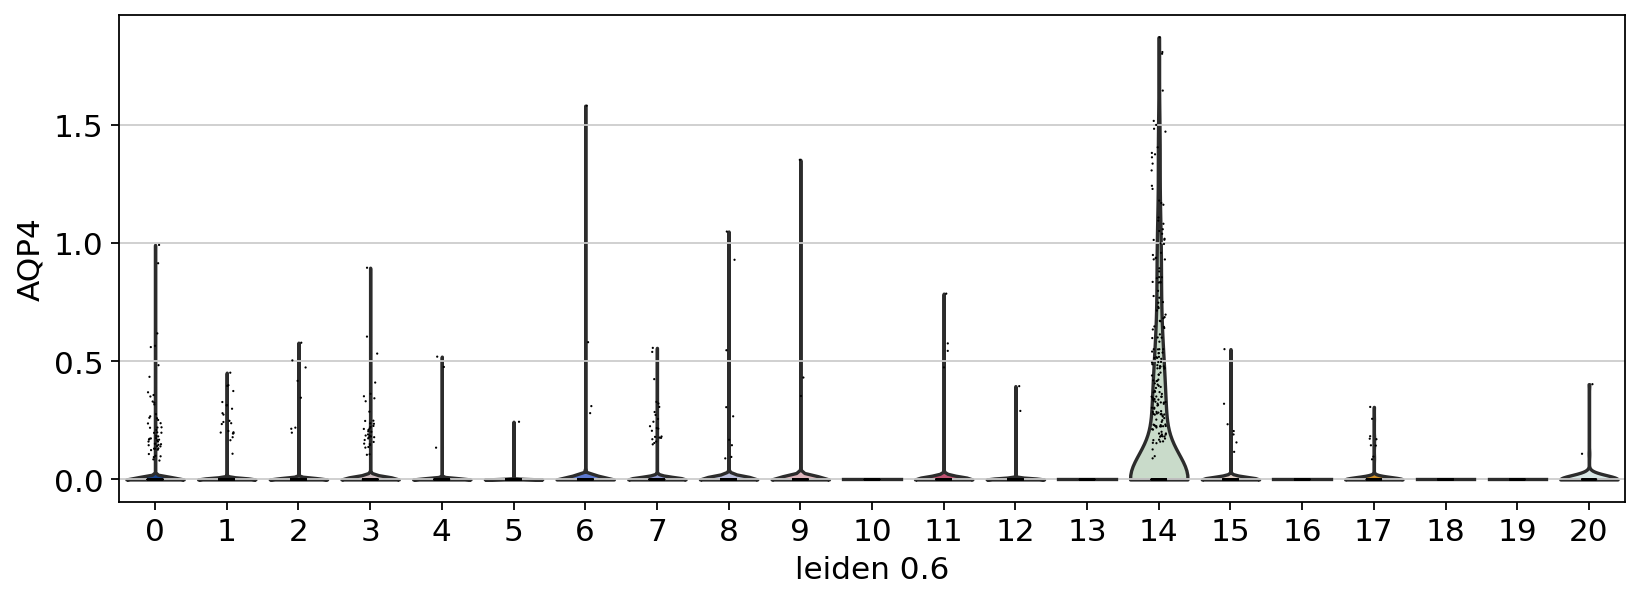

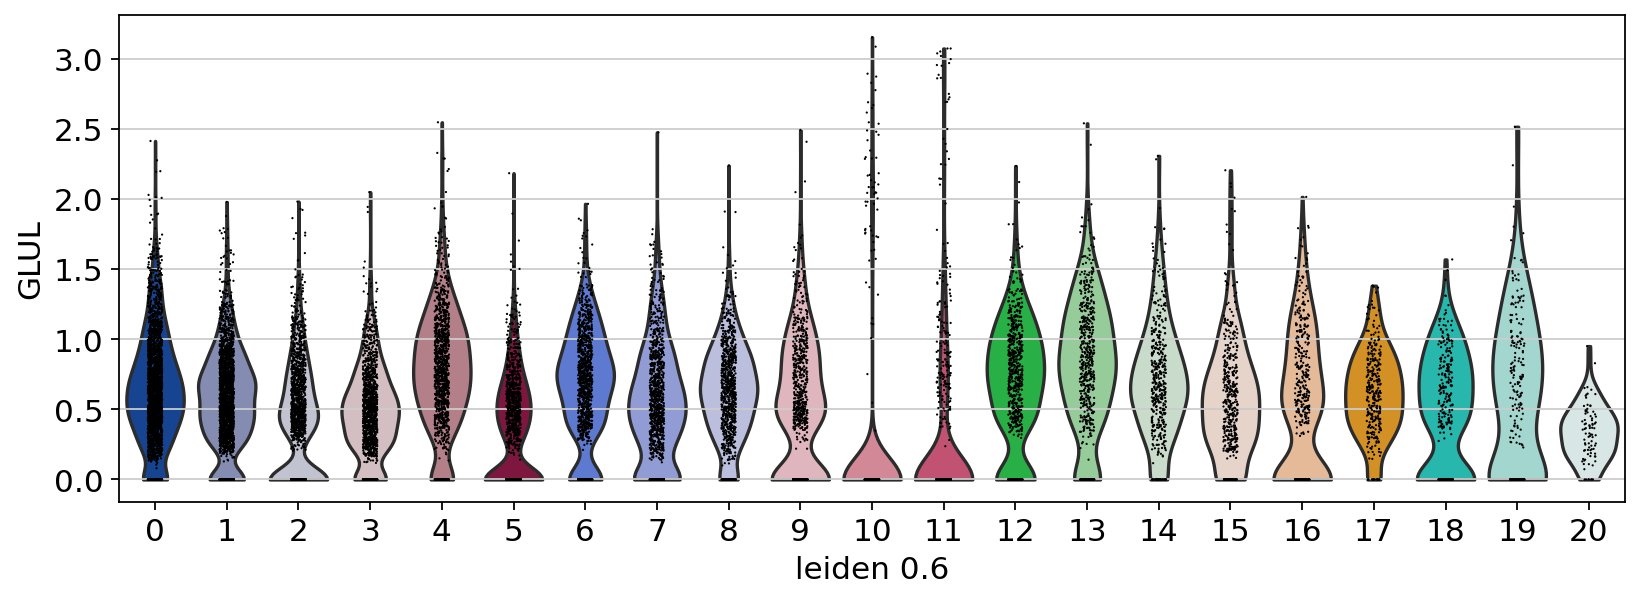

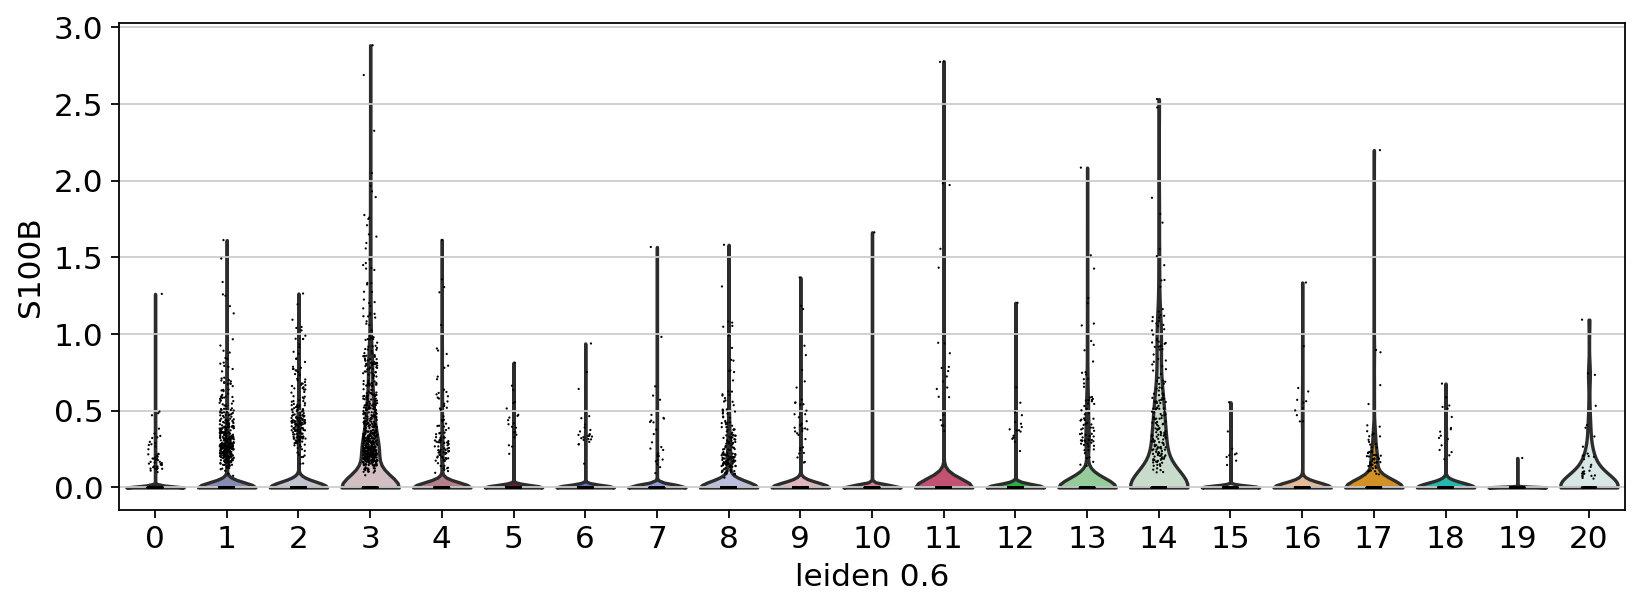

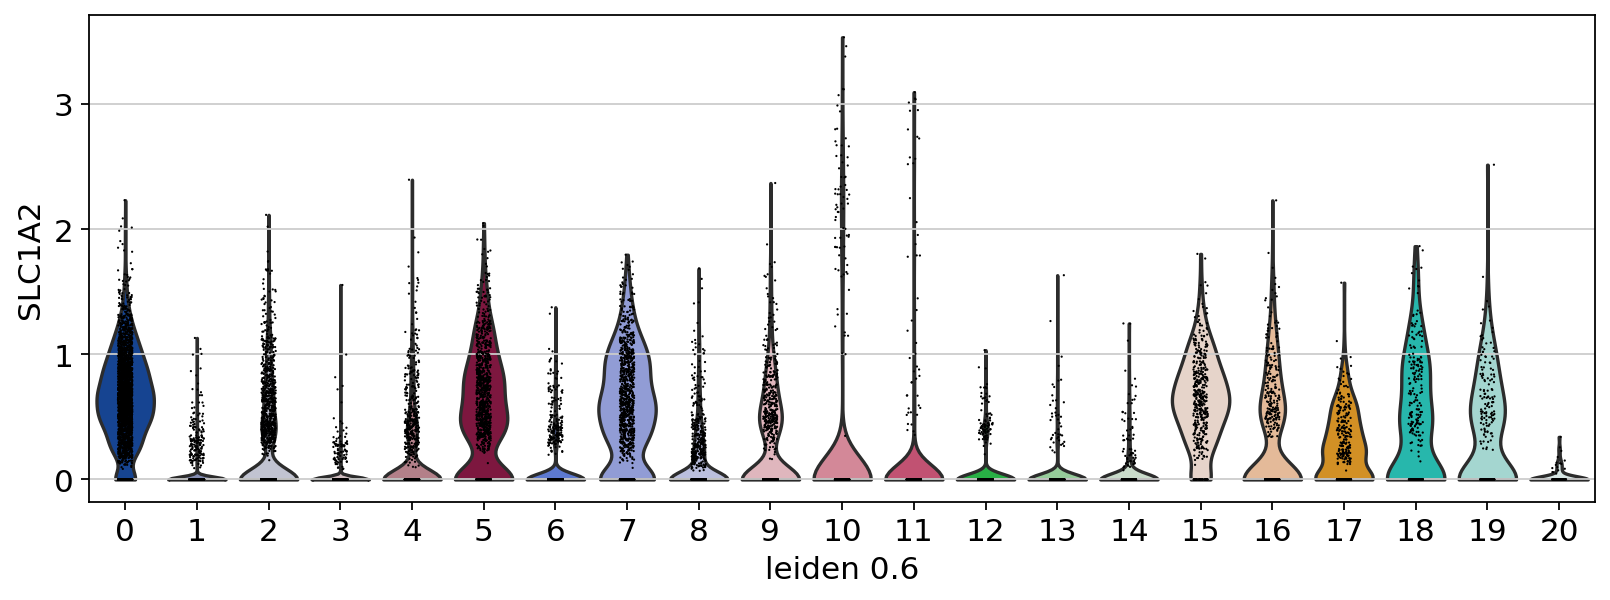

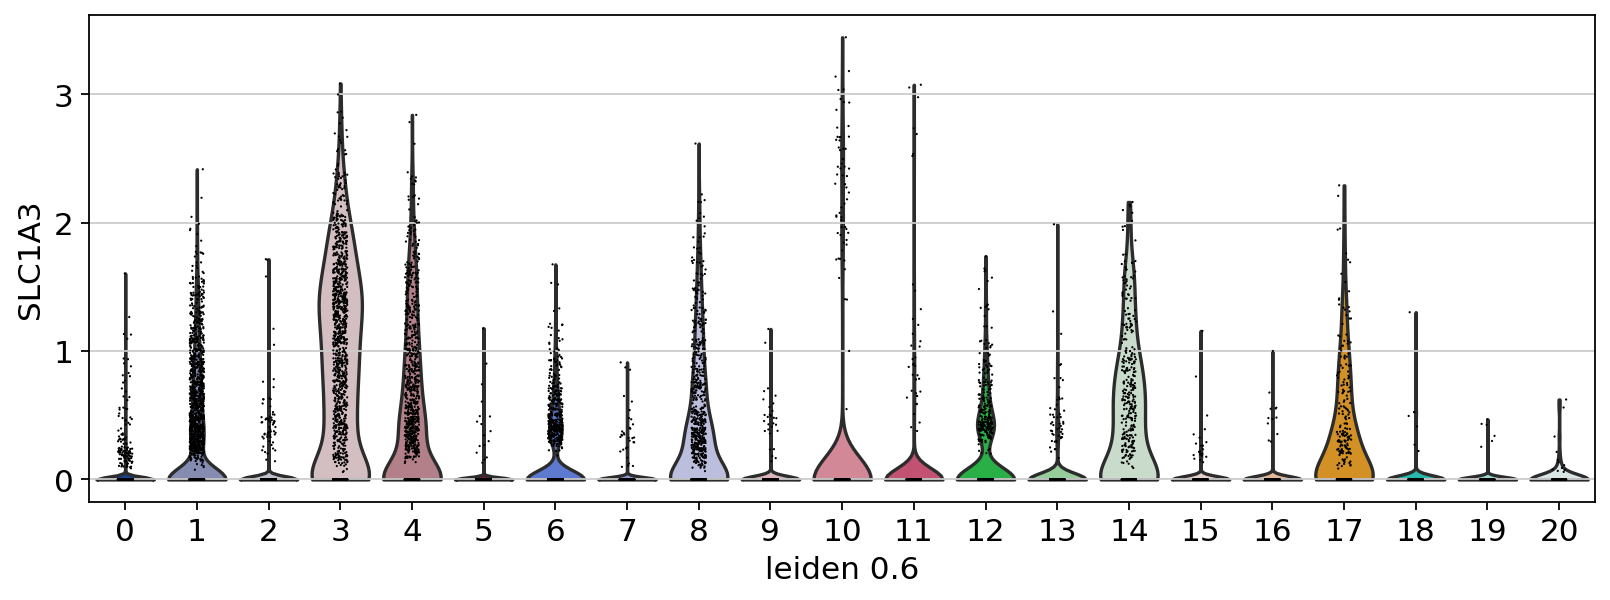

In [ ]:
# check the glia markers of andrian's
sc.settings.set_figure_params(dpi=80, figsize=(10, 4))
glia = ["ALDH1L1", "AQP4", "GLUL", "S100B", "SLC1A2", "SLC1A3"]
for gene in glia:
  sc.pl.violin(adata, gene, groupby='leiden_0.6')

In [ ]:
%ls -lth ../

total 74G
drwx------ 15 root root 4.0K Jun 12 14:37 Florian_data/
-rw-------  1 root root  459 Jun  5 02:07 md5sum.txt
-rw-------  1 root root  74G Jun  4 18:11 KOLF2-ARID2-A2.tar_.gstmp
drwx------  5 root root 4.0K May 26 03:00 integrated_data/
drwx------  2 root root 4.0K May 19 16:53 C9ORF72/
drwx------  2 root root 4.0K May 11 20:51 NGN2/
drwx------  2 root root 4.0K May 11 20:51 NIL/
drwx------  2 root root 4.0K May  8 13:24 Excel_NGN2_vs_NIL/
drwx------  2 root root 4.0K Apr 20 14:22 results_for_meeting/
drwx------  2 root root 4.0K Apr 16 22:24 pool_iPSC/
drwx------  2 root root 4.0K Apr 13 17:21 proteomics_DIA/
drwx------  2 root root 4.0K Apr 13 16:59 test_vireo/
drwx------  2 root root 4.0K Apr 13 16:41 forebrain/
drwx------  2 root root 4.0K Apr 13 16:41 pbmc3k/


In [ ]:
# the orginal data file has cell types for every organ, so only chose Brain
brain = pd.read_csv("../integrated_data/panglaoDB_brain.csv", index_col=0)
brain.shape

(1563, 13)

In [ ]:
# UI: ubiquitousness index: 0-1, the lower the more specific, higher score is convient for identifying housekeep genes
# sensitivity: how frequently this gene is expressed in this particular cell type
# specificity: how frequently this gene is not expressed in this particular cell type
brain.head()

species official gene symbol  ... specificity_human  specificity_mouse
195   Mm Hs                   TH  ...          0.001880           0.000000
196   Mm Hs                  DDC  ...          0.004699           0.016555
197   Mm Hs                  DBH  ...          0.000000           0.000770
198   Mm Hs                 PNMT  ...          0.000940           0.000321
199   Mm Hs              SLC18A2  ...          0.001253           0.000000

[5 rows x 13 columns]

In [ ]:
types = np.unique(brain["cell type"].values)
types

array(['Adrenergic neurons', 'Anterior pituitary gland cells',
       'Astrocytes', 'Bergmann glia', 'Cajal-Retzius cells',
       'Cholinergic neurons', 'Choroid plexus cells',
       'Dopaminergic neurons', 'Ependymal cells', 'GABAergic neurons',
       'Glutaminergic neurons', 'Glycinergic neurons', 'Immature neurons',
       'Interneurons', 'Meningeal cells', 'Microglia', 'Motor neurons',
       'Neural stem/precursor cells', 'Neuroblasts',
       'Neuroendocrine cells', 'Neurons', 'Noradrenergic neurons',
       'Oligodendrocyte progenitor cells', 'Oligodendrocytes',
       'Pinealocytes', 'Purkinje neurons', 'Pyramidal cells',
       'Radial glia cells', 'Retinal ganglion cells',
       'Satellite glial cells', 'Schwann cells', 'Serotonergic neurons',
       'Tanycytes', 'Trigeminal neurons'], dtype=object)

In [ ]:
# Description: Interneurons create neural circuits, enabling communication between sensory or motor neurons and the central nervous system.
# Description: Neurons of the Trigeminal ganglion (relaying sensation in the face and motor functions).
# Description: A neuroblast is a postmitotic cell that does not divide further and which will develop into a neuron after a migration phase. 
# Neuroblasts differentiate from neural stem cells and are committed to become neurons.

In [ ]:
cell_types = ['Dopaminergic neurons', 'GABAergic neurons', 'Glutaminergic neurons', 'Glycinergic neurons', 'Immature neurons', 
'Interneurons', 'Motor neurons', 'Neural stem/precursor cells', 'Neurons', 'Noradrenergic neurons', 'Neuroblasts', 'Neuroendocrine cells', 
'Adrenergic neurons', 'Cholinergic neurons', 'Noradrenergic neurons', 'Purkinje neurons', 'Serotonergic neurons', 'Trigeminal neurons']

# generate another marker dictionary


In [ ]:
df = pd.read_csv("../integrated_data/markers_sum_peng.csv")
df.head()

Cholinergic Neuroepithelial  ... progenitor NIL-motor_neuron
0        ACHE             NES  ...      ASCL1            SMI32
1        CHAT            SOX2  ...      AURKA            SMN12
2     SLC18A3          NOTCH1  ...       BCAN             LHX3
3         NaN            HES1  ...      CCND1              HB9
4         NaN            HES3  ...      CENPE              NaN

[5 rows x 45 columns]

In [ ]:
marker_dic_peng = {}
for type in df.columns.values:
  marker_dic_peng[type] = df.loc[:,type].dropna().to_list()


In [ ]:
marker_dic_peng.keys()

dict_keys(['Cholinergic', 'Neuroepithelial', 'Intermediate progenitors', 'Immature neurons', 'Mature neurons', 'Glutamatergic', 'GABAergic', 'Dopaminergic', 'Serotonergic', 'Astrocyte', 'Microglia', 'Schwann', 'Mature oligodendrocytes', 'Oligodendrocyte precursor cells', 'Radial glia', 'NIL_up', 'NGN2_up', 'Cortical_layer', 'Excitory cortical', 'Granule neurons cerebellum', 'Inhibitory', 'Excitory', 'Neuroprecursor', 'Presynaptic', 'Postsynaptic', 'Oligo_like', 'GABAergic_Vip_Sncg', 'GABAergic_Vip_Parm1_1', 'GABAergic_Vip_Mybpc1', 'GABAergic_Vip_Gpc3', 'GABAergic_Vip_Chat', 'GABAergic_Ndnf_Cxcl14', 'GABAergic_Ndnf_Car4', 'GABAergic_Igtp', 'GABAergic_and_Glutamatergic', 'Astro_like', 'Late_neuroblast', 'Early_neuroblast', 'cortical_andrian', 'dopminergic_andrian', 'glia_andrain', 'hypothalamic_andrian', 'mature_neuron_andrian', 'progenitor', 'NIL-motor_neuron'])

In [ ]:
marker_dic_peng["Cholinergic"]

['ACHE', 'CHAT', 'SLC18A3']

In [ ]:
cell_annotation2 = sc.tl.marker_gene_overlap(adata, marker_dic_peng, key='rank_genes_groups')

In [ ]:
cell_annotation2

0    1    2    3  ...   17   18   19   20
Cholinergic                      1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0
Neuroepithelial                  0.0  1.0  0.0  0.0  ...  2.0  0.0  0.0  0.0
Intermediate progenitors         0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Immature neurons                 0.0  0.0  1.0  0.0  ...  0.0  2.0  0.0  0.0
Mature neurons                   1.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0
Glutamatergic                    0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
GABAergic                        0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Dopaminergic                     0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Serotonergic                     0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Astrocyte                        0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0
Microglia                        0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Schwann                          0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  0.0
Mature oligodendrocytes          0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Oligodendrocyte precursor cells  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Radial glia                      0.0  1.0  0.0  1.0  ...  3.0  0.0  0.0  0.0
NIL_up                           0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  0.0
NGN2_up                          0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0
Cortical_layer                   0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0
Excitory cortical                0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Granule neurons cerebellum       0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Inhibitory                       0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Excitory                         0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Neuroprecursor                   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Presynaptic                      0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Postsynaptic                     0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Oligo_like                       1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  0.0
GABAergic_Vip_Sncg               0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
GABAergic_Vip_Parm1_1            0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
GABAergic_Vip_Mybpc1             0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  1.0
GABAergic_Vip_Gpc3               0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0
GABAergic_Vip_Chat               0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0
GABAergic_Ndnf_Cxcl14            0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
GABAergic_Ndnf_Car4              0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0
GABAergic_Igtp                   0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0
GABAergic_and_Glutamatergic      0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0
Astro_like                       1.0  4.0  0.0  6.0  ...  7.0  2.0  1.0  0.0
Late_neuroblast                  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Early_neuroblast                 0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0
cortical_andrian                 0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0
dopminergic_andrian              1.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0
glia_andrain                     0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0
hypothalamic_andrian             0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0
mature_neuron_andrian            3.0  0.0  6.0  0.0  ...  0.0  4.0  0.0  0.0
progenitor                       0.0  3.0  0.0  1.0  ...  5.0  0.0  0.0  0.0
NIL-motor_neuron                 0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0

[45 rows x 21 columns]

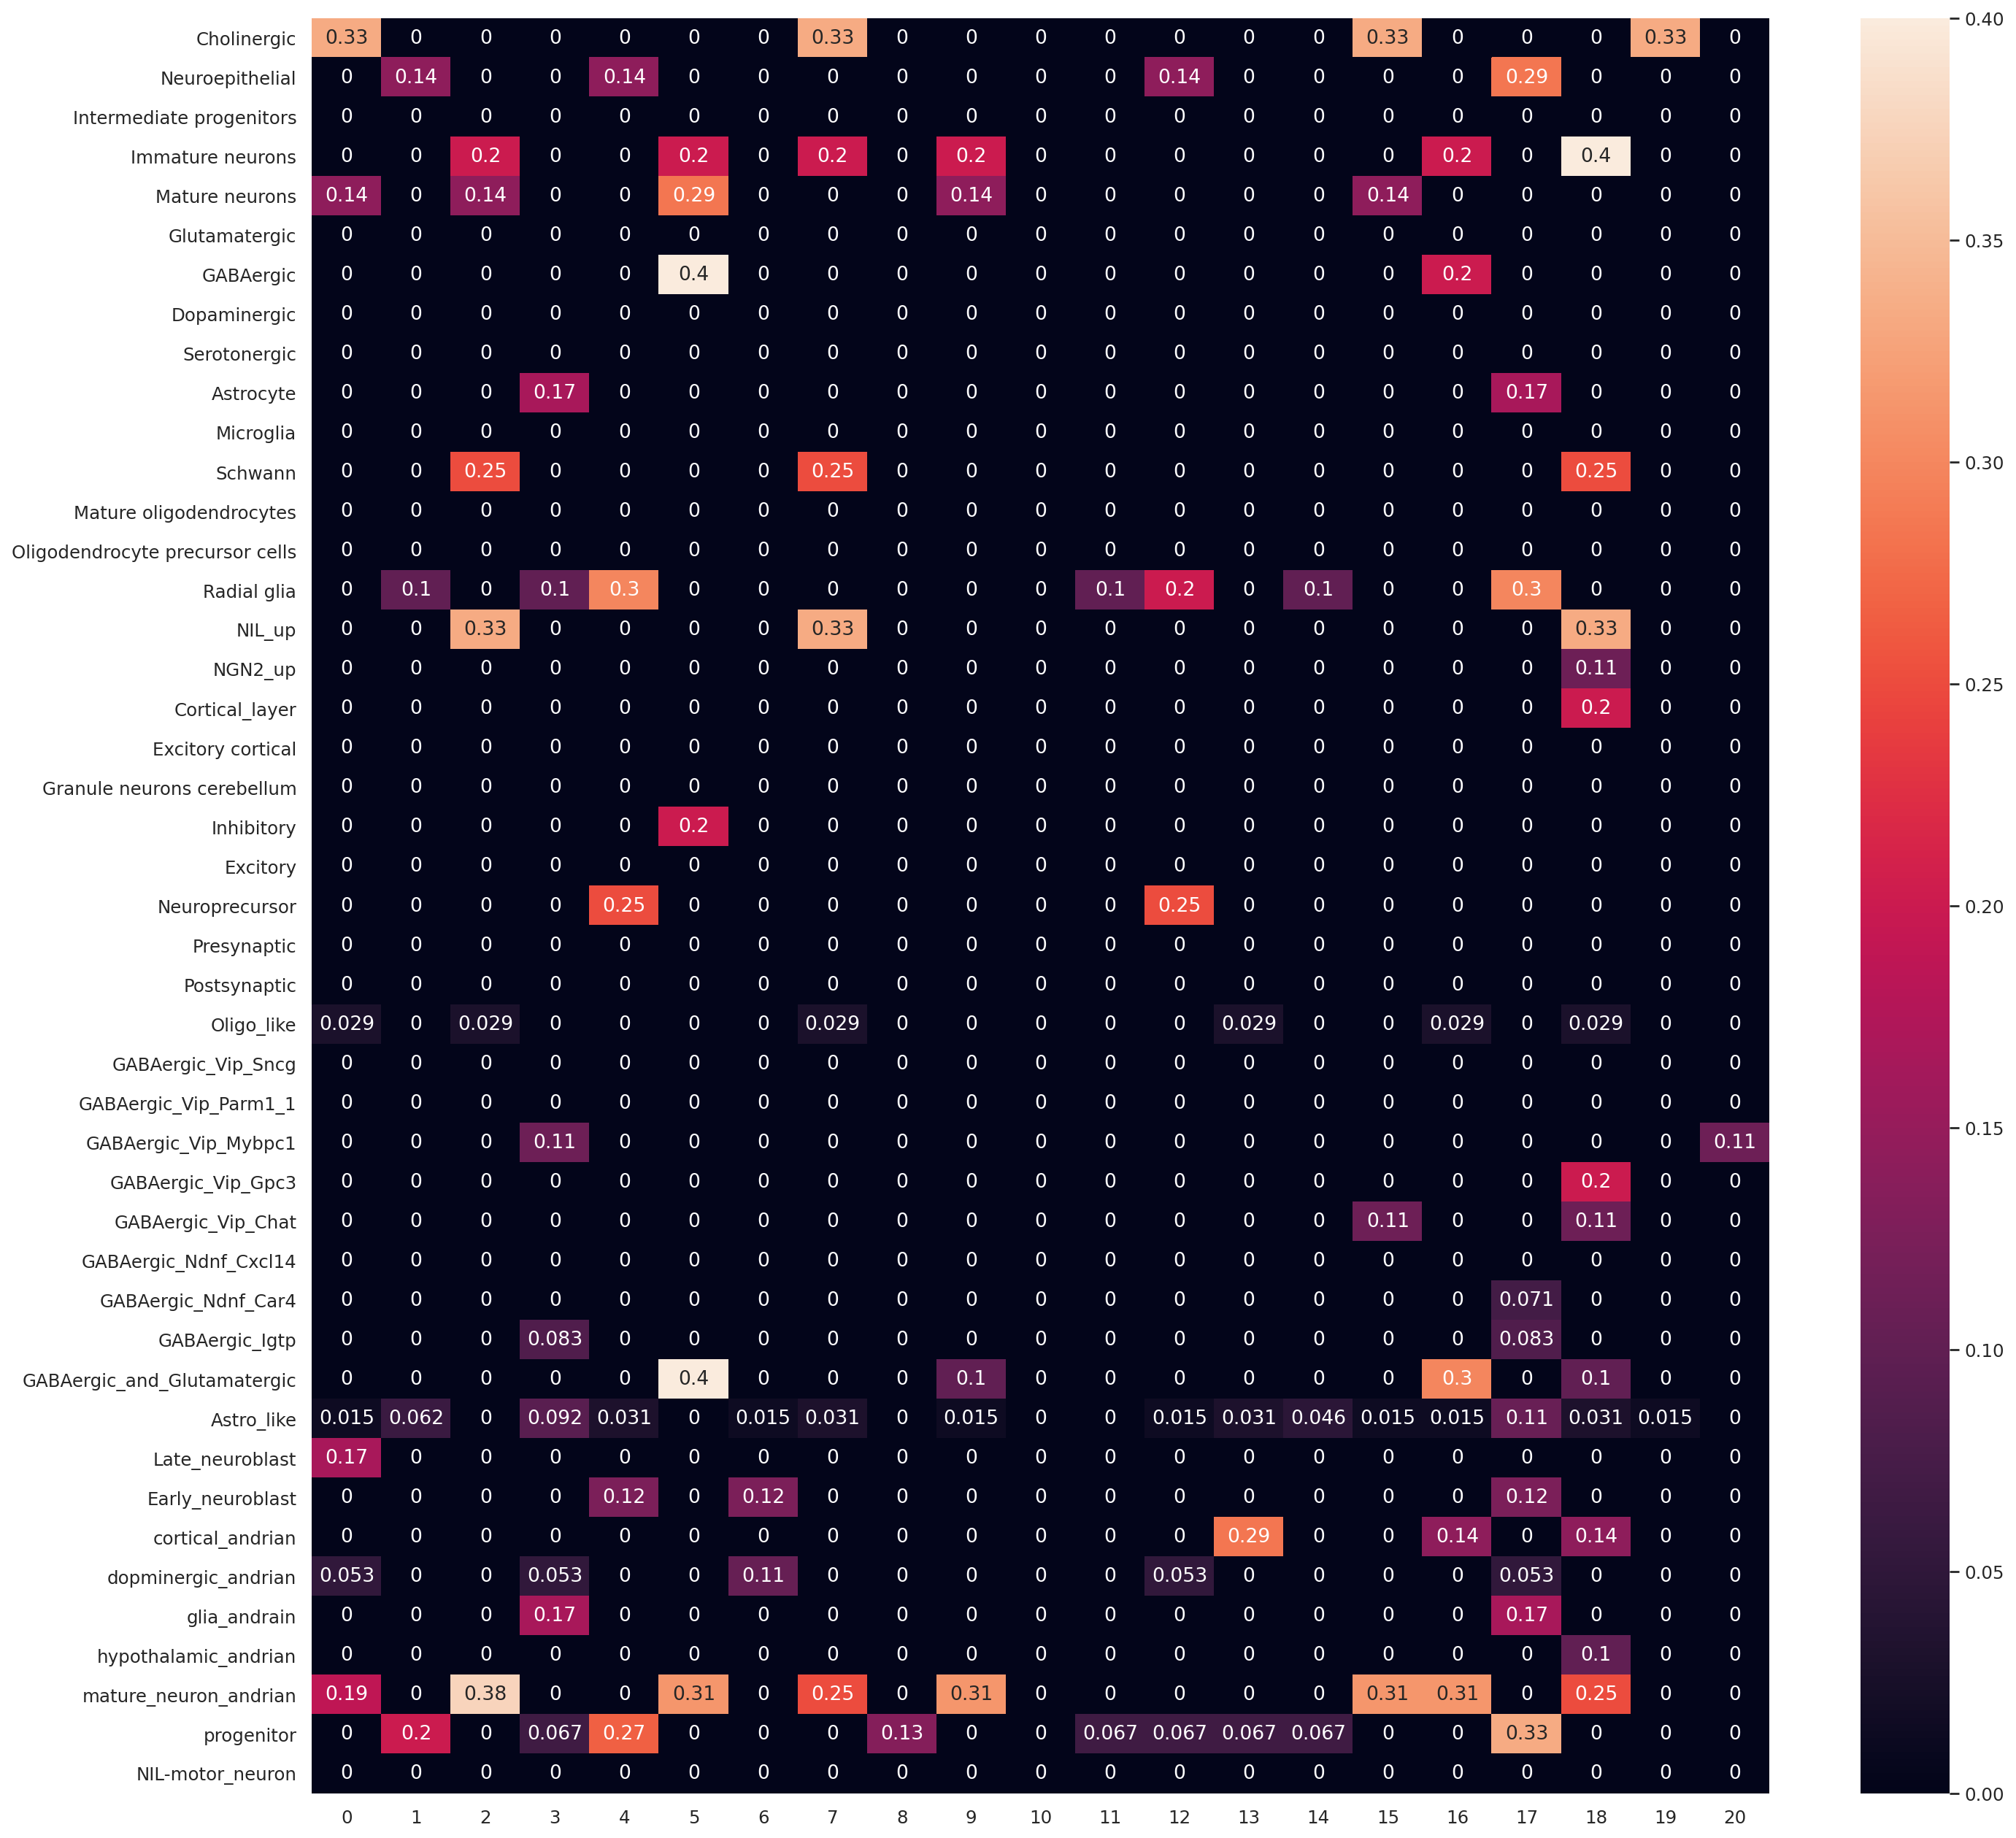

In [ ]:
cell_annotation_norm2 = sc.tl.marker_gene_overlap(adata, marker_dic_peng, key='rank_genes_groups', normalize='reference')
sns.set(rc={'figure.figsize':(20, 20)})
# cbar=False, 
sns.heatmap(cell_annotation_norm2, annot=True)

In [ ]:
marker_dic = {}
for type in types:
  marker_dic[type] = brain[brain["cell type"] == type]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups')

In [ ]:
cell_annotation

0    1    2    3  ...   17   18   19   20
Adrenergic neurons                 1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Anterior pituitary gland cells     2.0  0.0  1.0  0.0  ...  1.0  1.0  0.0  0.0
Astrocytes                         0.0  1.0  1.0  3.0  ...  4.0  1.0  0.0  0.0
Bergmann glia                      1.0  2.0  0.0  1.0  ...  4.0  0.0  0.0  1.0
Cajal-Retzius cells                4.0  1.0  0.0  0.0  ...  0.0  5.0  1.0  0.0
Cholinergic neurons                1.0  0.0  0.0  0.0  ...  0.0  1.0  1.0  0.0
Choroid plexus cells               0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Dopaminergic neurons               0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Ependymal cells                    0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0
GABAergic neurons                  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Glutaminergic neurons              0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0
Glycinergic neurons                0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Immature neurons                   0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  0.0
Interneurons                       9.0  1.0  0.0  1.0  ...  1.0  3.0  2.0  1.0
Meningeal cells                    0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0
Microglia                          0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Motor neurons                      1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Neural stem/precursor cells        0.0  1.0  1.0  2.0  ...  1.0  3.0  0.0  2.0
Neuroblasts                        1.0  0.0  2.0  0.0  ...  0.0  2.0  0.0  0.0
Neuroendocrine cells               1.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  0.0
Neurons                           14.0  0.0  5.0  0.0  ...  0.0  5.0  3.0  0.0
Noradrenergic neurons              0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Oligodendrocyte progenitor cells   0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Oligodendrocytes                   0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  0.0
Pinealocytes                       0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Purkinje neurons                   2.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0
Pyramidal cells                    0.0  0.0  1.0  0.0  ...  0.0  2.0  0.0  0.0
Radial glia cells                  0.0  1.0  0.0  1.0  ...  1.0  1.0  0.0  0.0
Retinal ganglion cells             3.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  0.0
Satellite glial cells              0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0
Schwann cells                      0.0  0.0  1.0  0.0  ...  1.0  2.0  0.0  2.0
Serotonergic neurons               0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0
Tanycytes                          0.0  4.0  0.0  2.0  ...  3.0  1.0  0.0  1.0
Trigeminal neurons                 1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0

[34 rows x 21 columns]

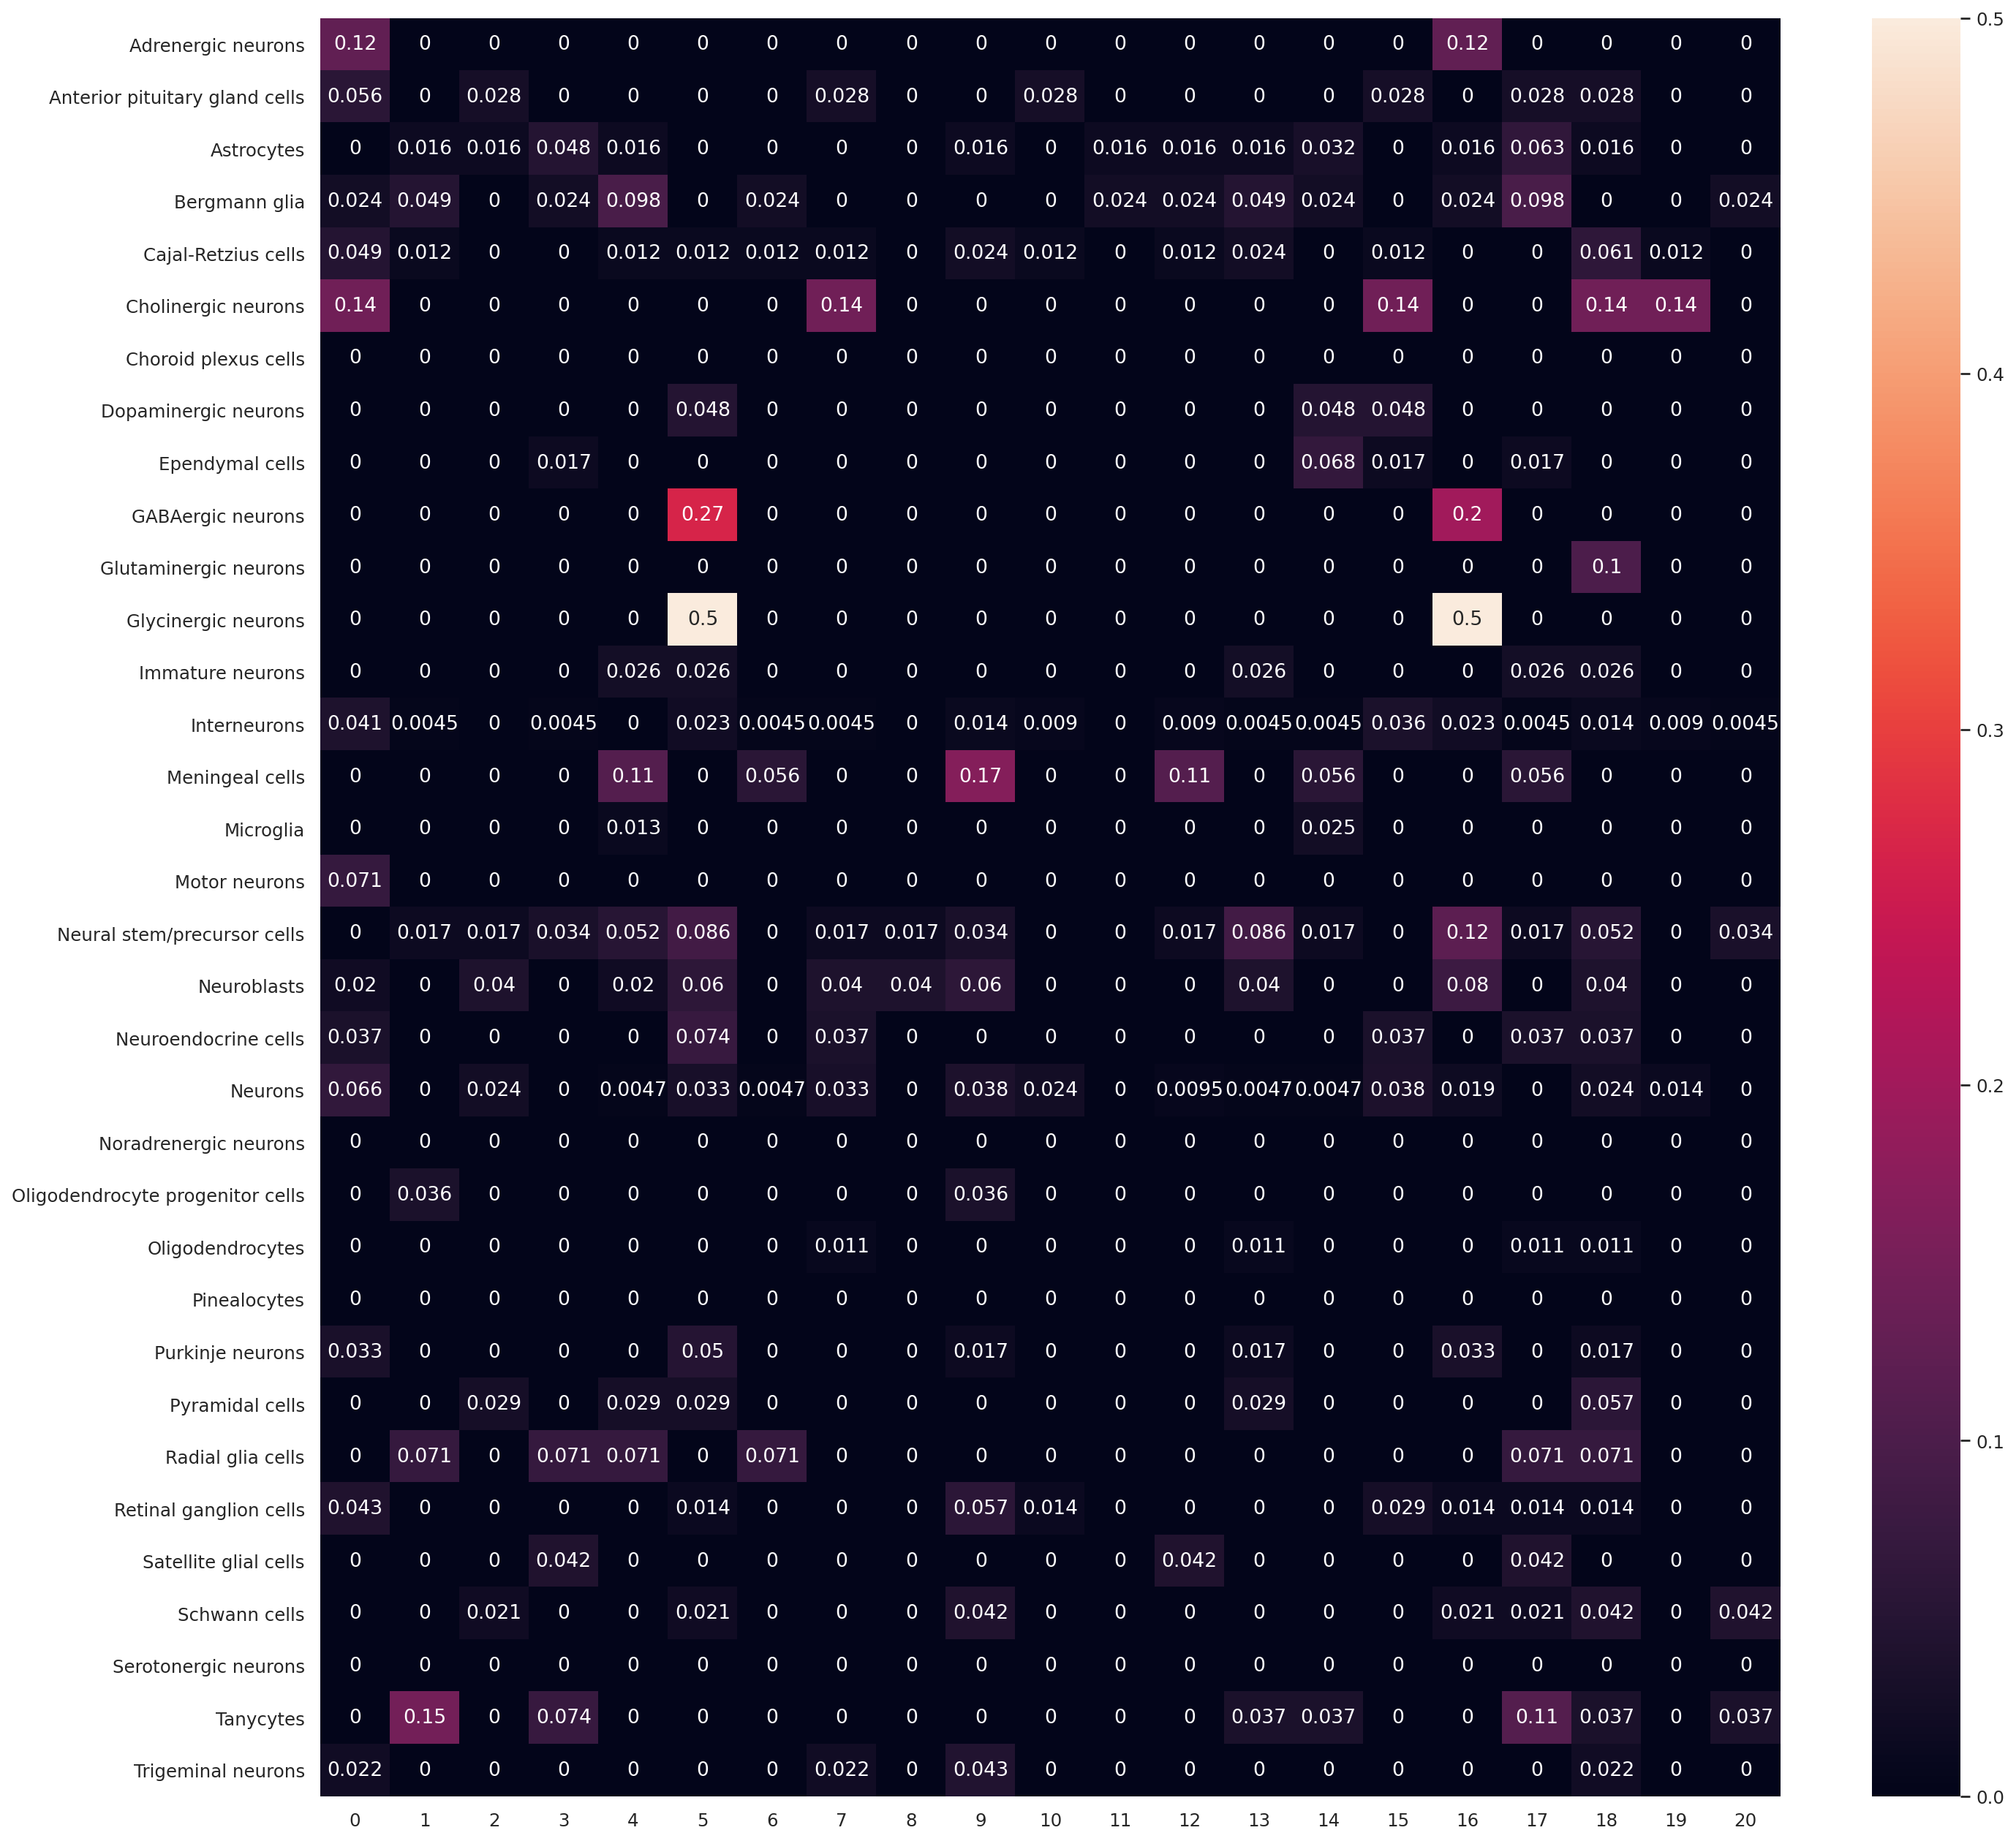

In [ ]:
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups', normalize='reference')
sns.set(rc={'figure.figsize':(20, 20)})
# cbar=False, 
sns.heatmap(cell_annotation_norm, annot=True)

In [ ]:
## ???refine known markers by only choose those only mainly expressed in less than 2 cell types
marker_dic2 = {}
for type in cell_types:
  marker_dic2[type] = marker_df[(marker_df["cell type"] == type) & (marker_df[""]) ]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic2, key='rank_genes_groups')
cell_annotation

# Annotation

mixed, Glutaminergic neurons, Interneurons/precursor, Adrenergic neurons, mixed,

In [ ]:
# reassing the cluster names
adata.rename_categories('leiden_0.4', ['TA', 'EP (early)', 'Stem', 'Goblet', 'EP (stress)', 'Enterocyte', 'Paneth', 'Enteroendocrine', 'Tuft'])

simply at the fraction of known marker genes that are found in the cluster marker gene sets from the rank_genes_groups() function.

In [ ]:
#not execulte yet
out_dir = 'integrated_data/iPSC_combined2_hNGN2_NIL_13May2020.h5d'
adata.write(out_dir)